In [26]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
# import cvxpy as cvx
import os

from util import *
# from data_loader import * 
# from module_deconv import *
# from module_exp import *
from sc_deconv import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import scanpy.api as sc
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import pairwise_distances

sc.settings.verbosity = 3                # increase for more output
sc.settings.set_dpi(100)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy 0.4.2 on 2018-02-02 15:28.


In [3]:
import seaborn as sns

[ 2.4   2.15  1.2  -0.7  -5.  ]


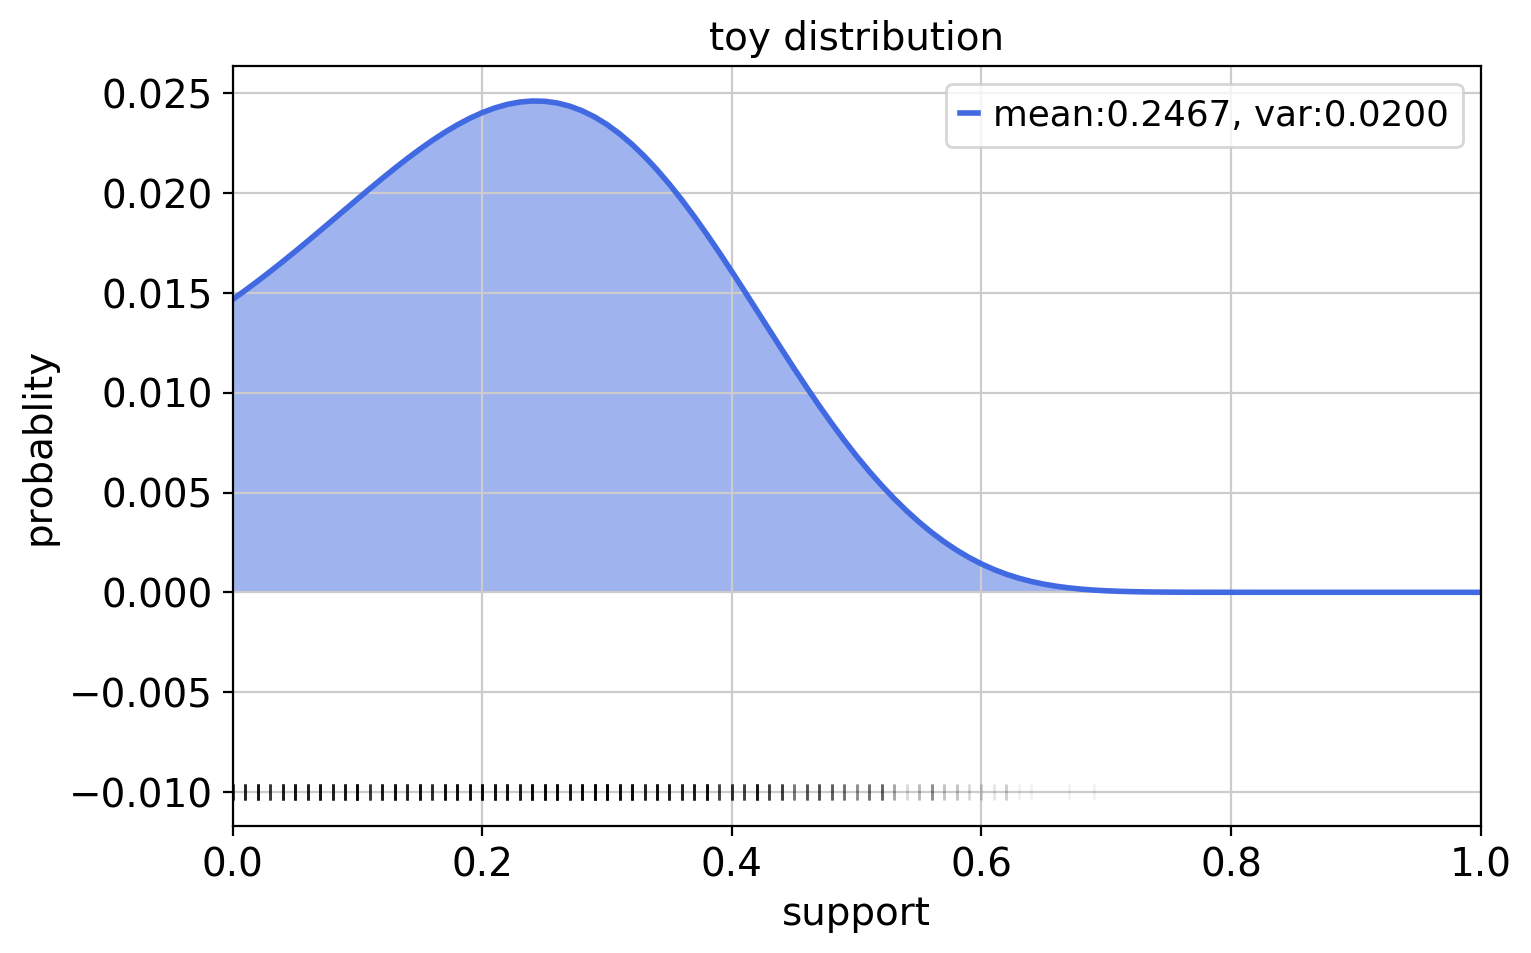

In [4]:
## creating a toy 1d distribution instance
np.random.seed(42)
p,x=toy_dist(vis=1,opt='1d_Q')

In [5]:
## generate the simulated read count data
N_c=8000
N_r=38
X,Y,data_info=data_gen_1d(p_hat,dd_info['x'],N_c,N_r,noise='poi',vis=1)

NameError: name 'p_hat' is not defined

### distribution estimation

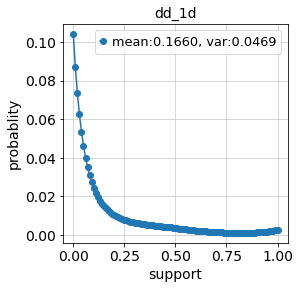

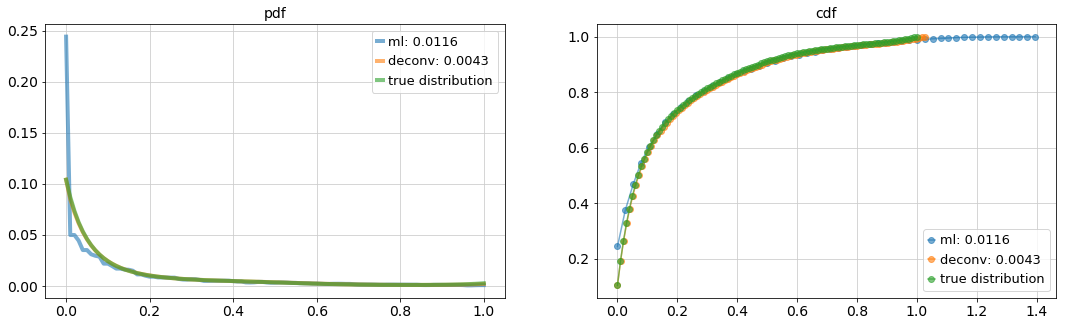

In [87]:
## distribution estimation
# input: Y  
# summary function: Y --> Y_pdf, Y_supp
# specify the scale of x and N_r 

p_hat,dd_info=dd_1d(Y,noise='poi',vis=1,N_r=None)
p_hat_ml,ml_info=ml_1d(Y)
_=plot_result_1d(p_hat,p_hat,p_hat_ml,dd_info,ml_info,data_info)

## 8k PBMC @ 100K rpc

In [6]:
filename_data = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/matrix.mtx'
filename_genes = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/genes.tsv'
filename_barcodes = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/barcodes.tsv'

In [7]:
%%time
adata = sc.read(filename_data, cache=True).transpose()
adata.var_names = np.genfromtxt(filename_genes, dtype=str)[:, 1]
adata.smp_names = np.genfromtxt(filename_barcodes, dtype=str)
sc.logging.print_memory_usage()

... writing an h5 cache file to speedup reading next time
Memory usage: current 0.24 GB, difference +0.24 GB
CPU times: user 51.9 s, sys: 607 ms, total: 52.5 s
Wall time: 52.7 s


CST3
Average counts per cell = 7.001789762558167


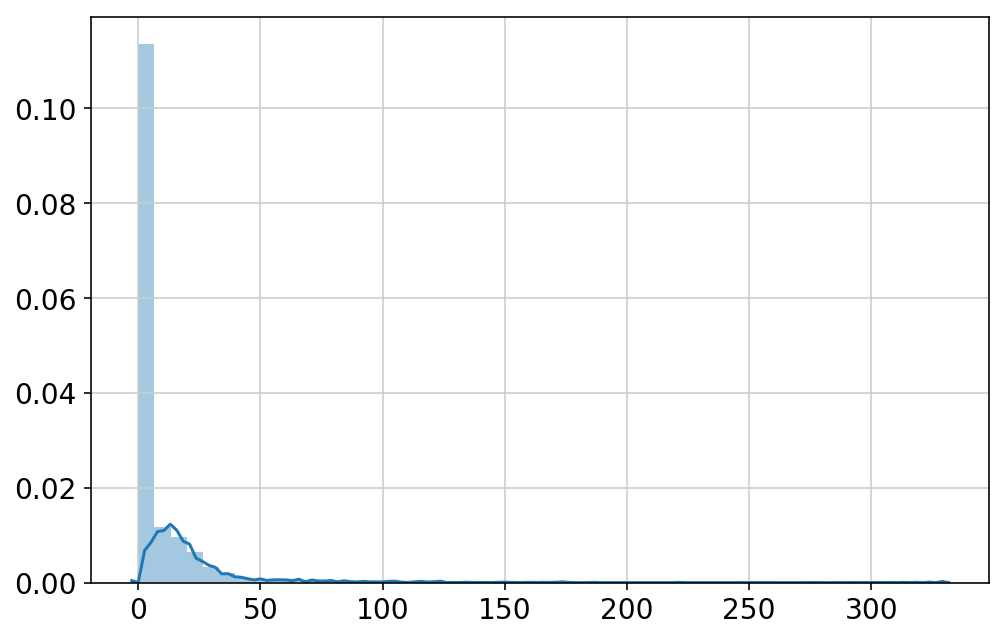

gamma:112
n_degree:7
alpha_hat:  [ 2.69659075  3.31994636  0.82967042 -8.17998716  1.17593824  1.76083597
 -1.60796483]
-l:2.4350556483860535, reg:0.009296311330597141


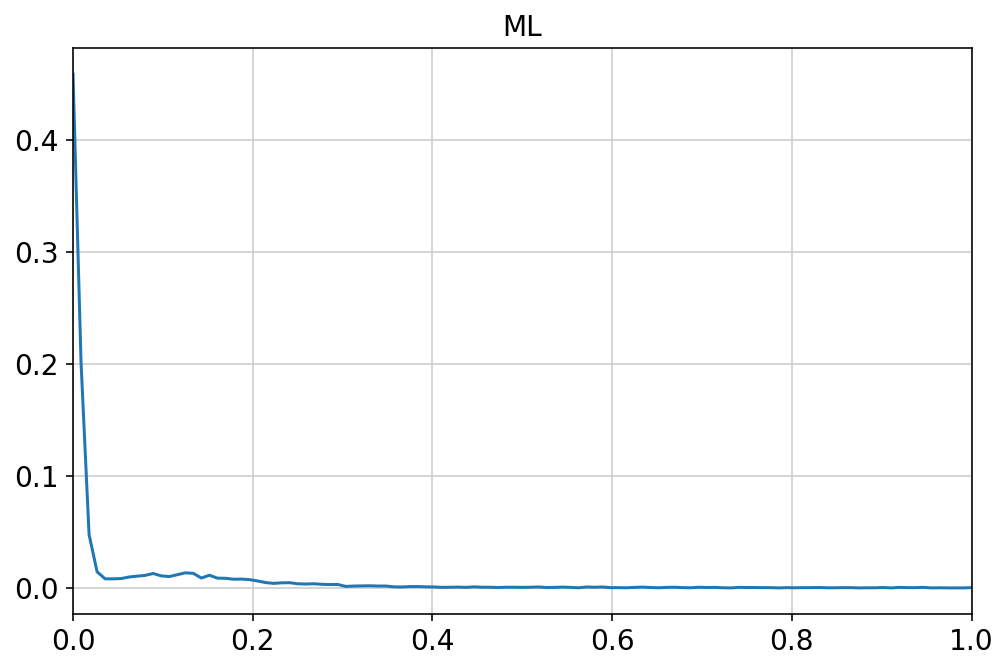

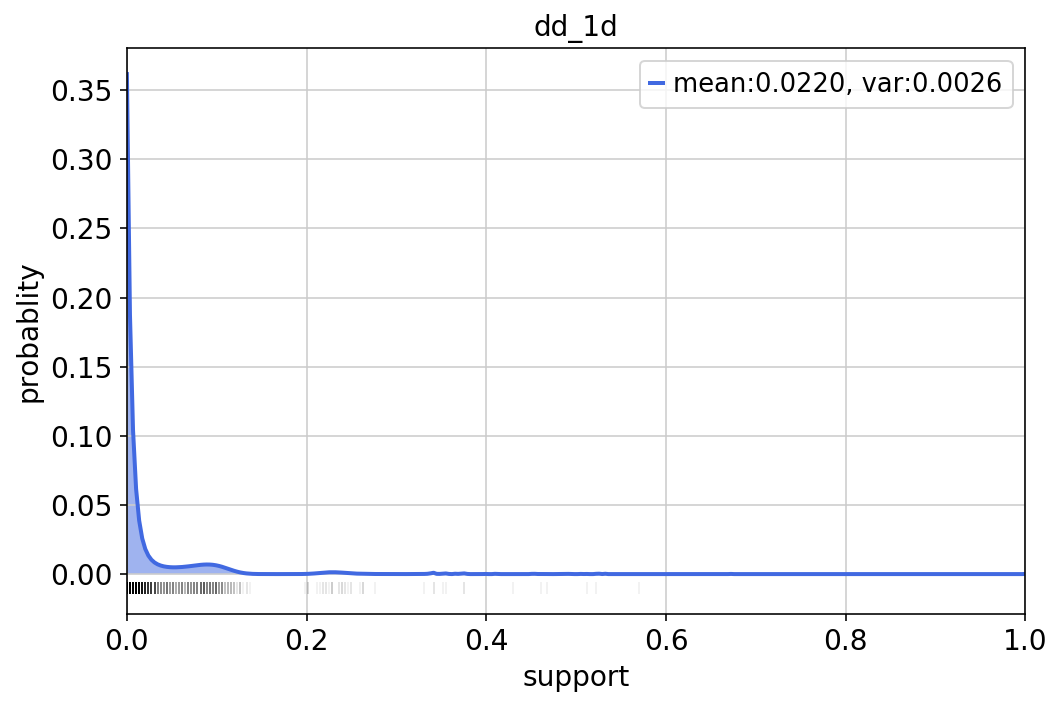

estimated gamma: 329.0


In [34]:
gene='CST3'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.xlim([0,1])
plt.title('ML')

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None)
print("estimated gamma:",dd_info['gamma'])

FTL
Average counts per cell = 27.60064431452094


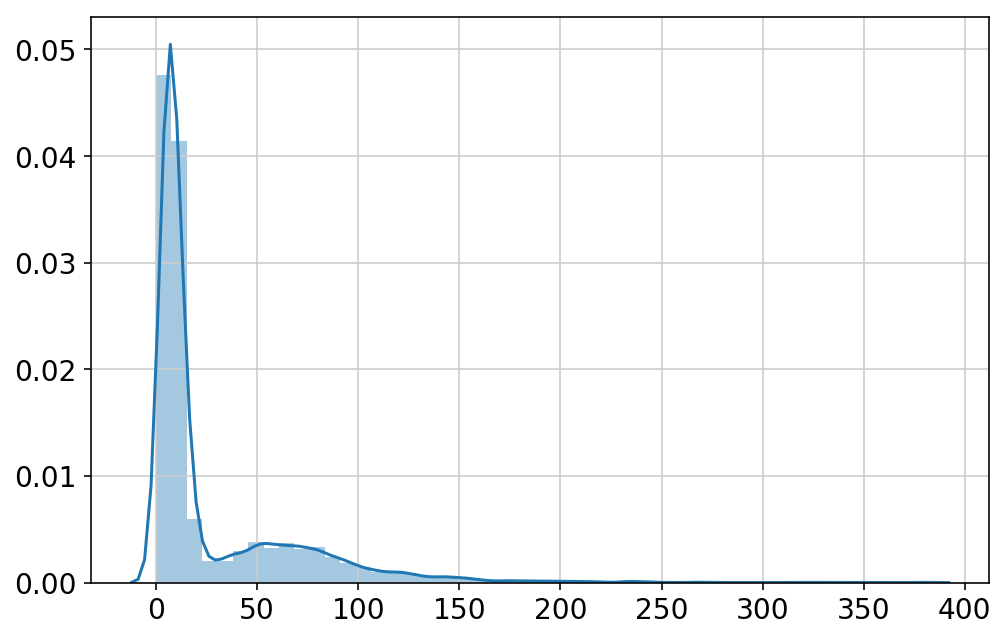

gamma:211
n_degree:7
alpha_hat:  [ 1.1456773   0.41901494  0.46531681  1.54607761 -1.51320822 -1.4074495
 -0.65802665]
-l:4.256514930733835, reg:0.0008798737964217304


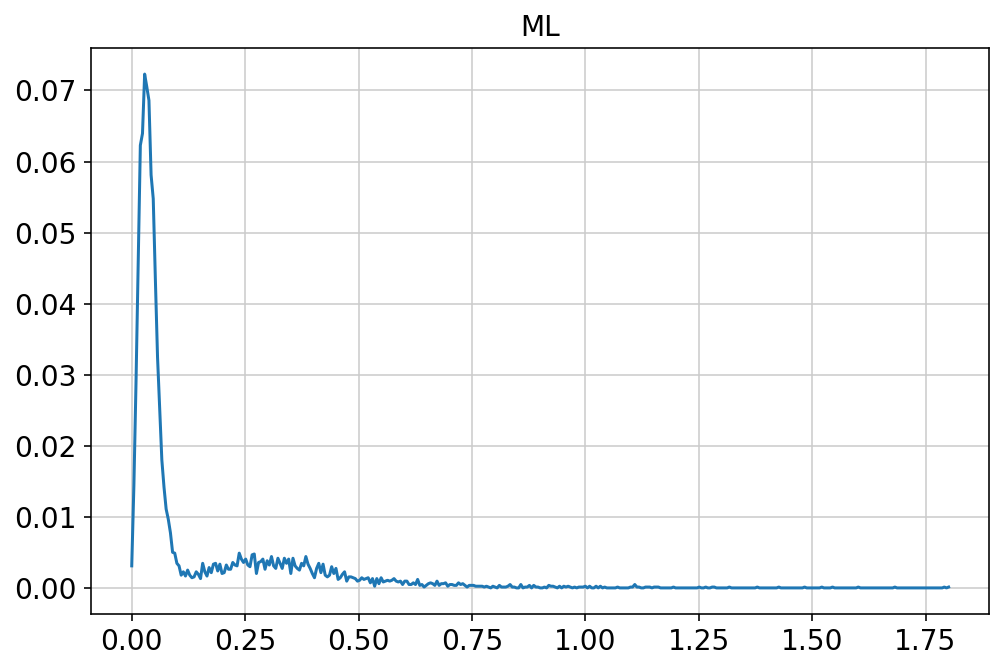

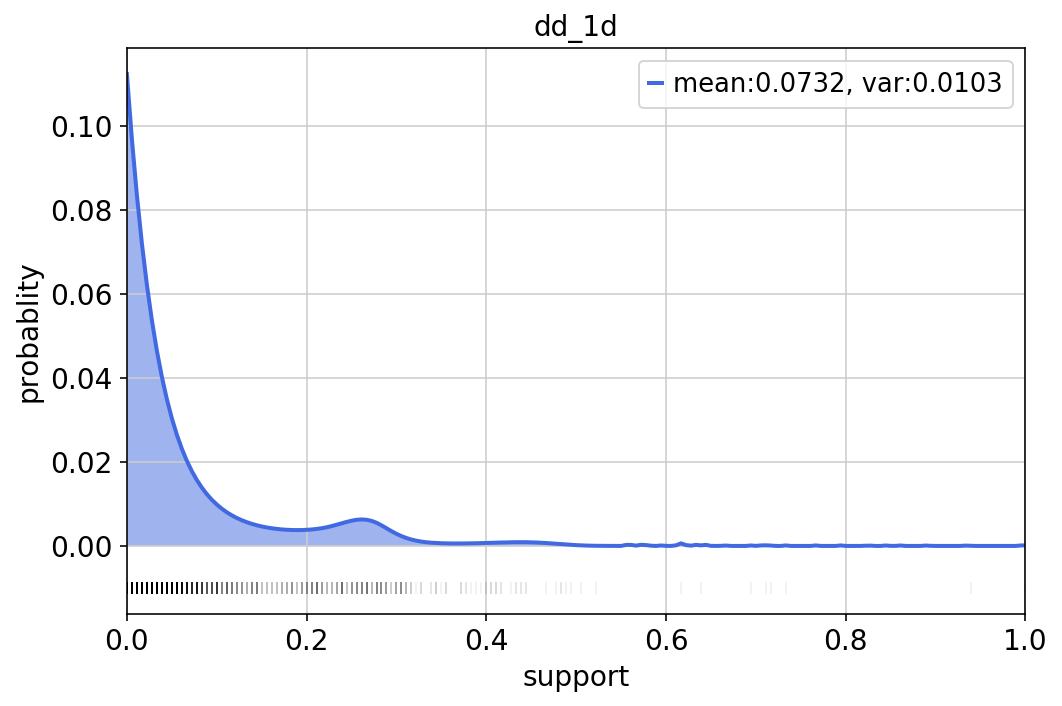

estimated gamma: 380.0


In [35]:
gene='FTL'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.title('ML')

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None)
print("estimated gamma:",dd_info['gamma'])

# plt.figure(figsize=[8,5])
# X=np.random.choice(dd_info['x'], 2000, p=p_hat)
# plt.plot(dd_info['x'],p_hat,marker='.',lw=2,markersize=0,color="royalblue")
# # plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
# # plt.xlim([0,1])
# # plt.ylim([0,1.05*np.max(p)])
# plt.plot(X, [-0.01]*len(X), '|', color='k',alpha=0.05)
# plt.show()

In [21]:
genes=["S100A9","S100A8","S100A4","LGALS2","FCN1","CD14","GZMB","IGFBP7","CD79A","CD3E","LYZ","MS4A1",
       "GNLY","FGFBP2","FCER1G","LDHB","IL7R","LST1","PF4","NKG7","CST3","CCR7"]

S100A9
Average counts per cell = 16.659587161436583


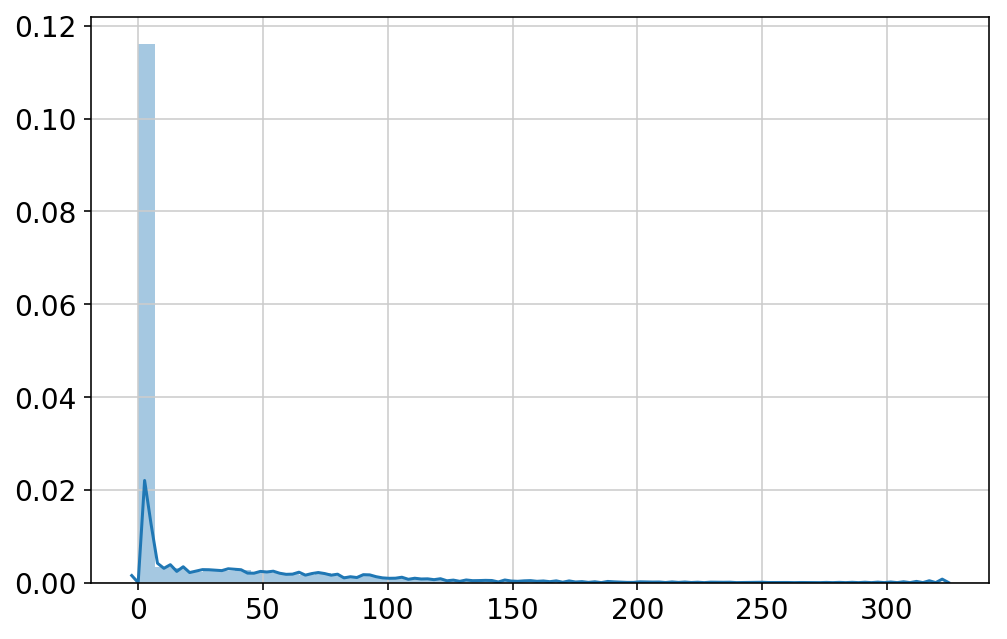

gamma:201
n_degree:7
alpha_hat:  [ 0.09396246  1.19598472  1.48432119 -1.26551523 -0.04595297 -0.25339137
 -1.21154746]
-l:3.1661238295380683, reg:0.0006778112714169145


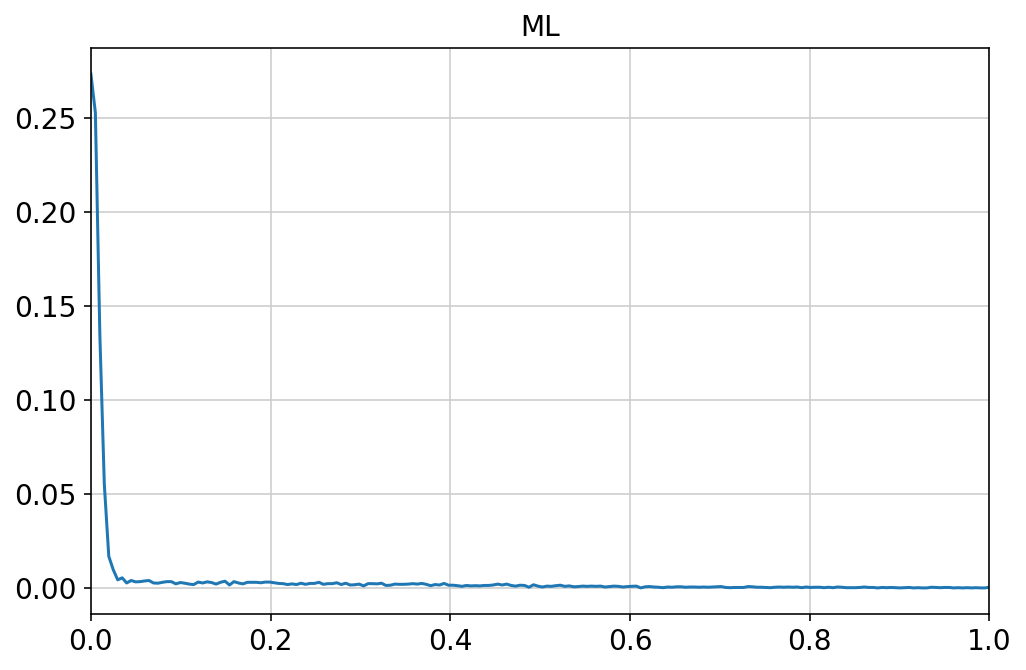

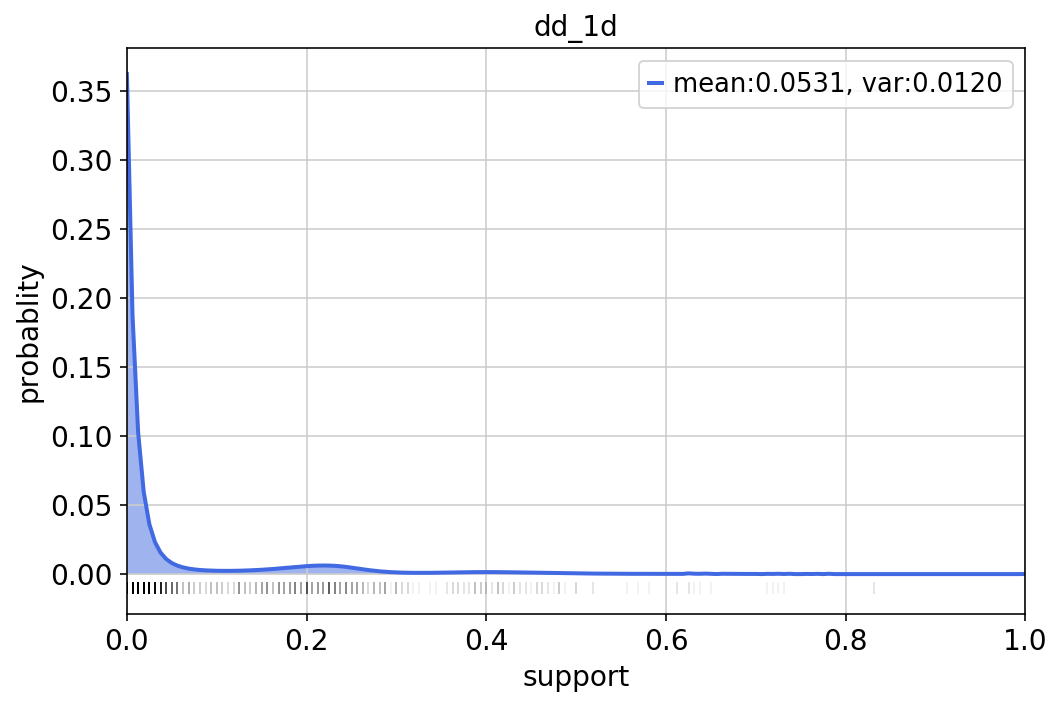

estimated gamma: 322.0
-------------------------------------------------------------------------
S100A8
Average counts per cell = 13.68273475718888


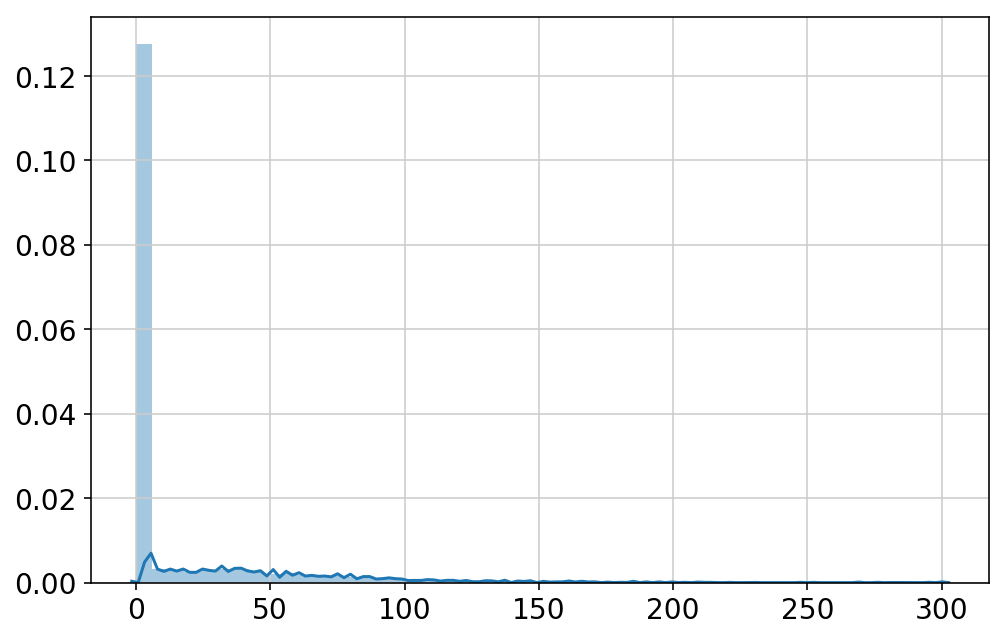

gamma:181
n_degree:7
alpha_hat:  [ 0.18493455  1.50505391  1.67350238 -1.90217771  0.01242327 -0.15987282
 -1.31619878]
-l:2.889065240437139, reg:0.0010476371185902246


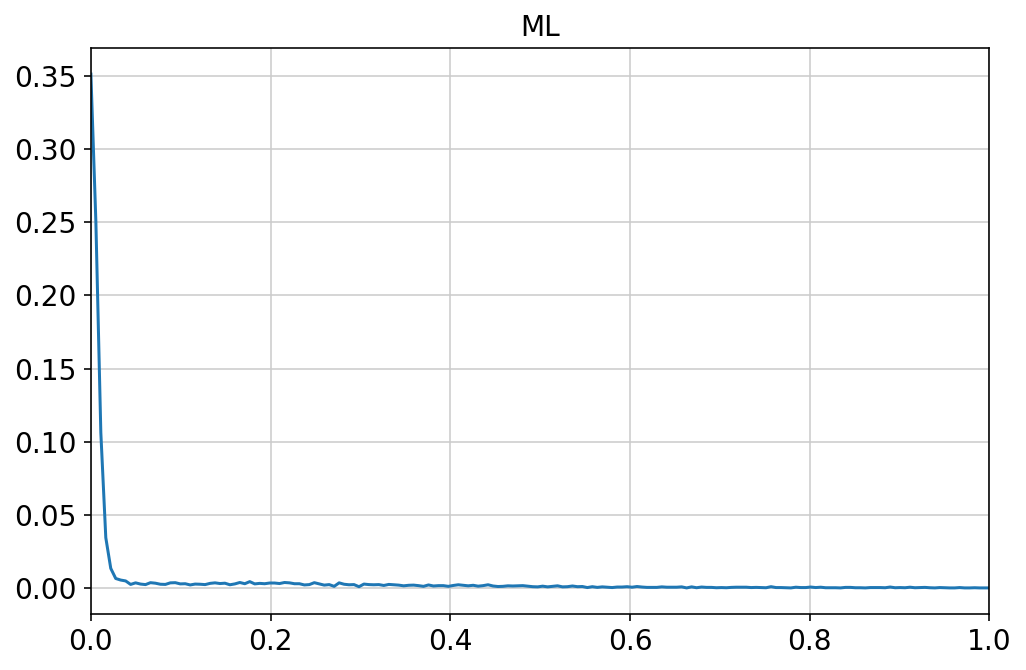

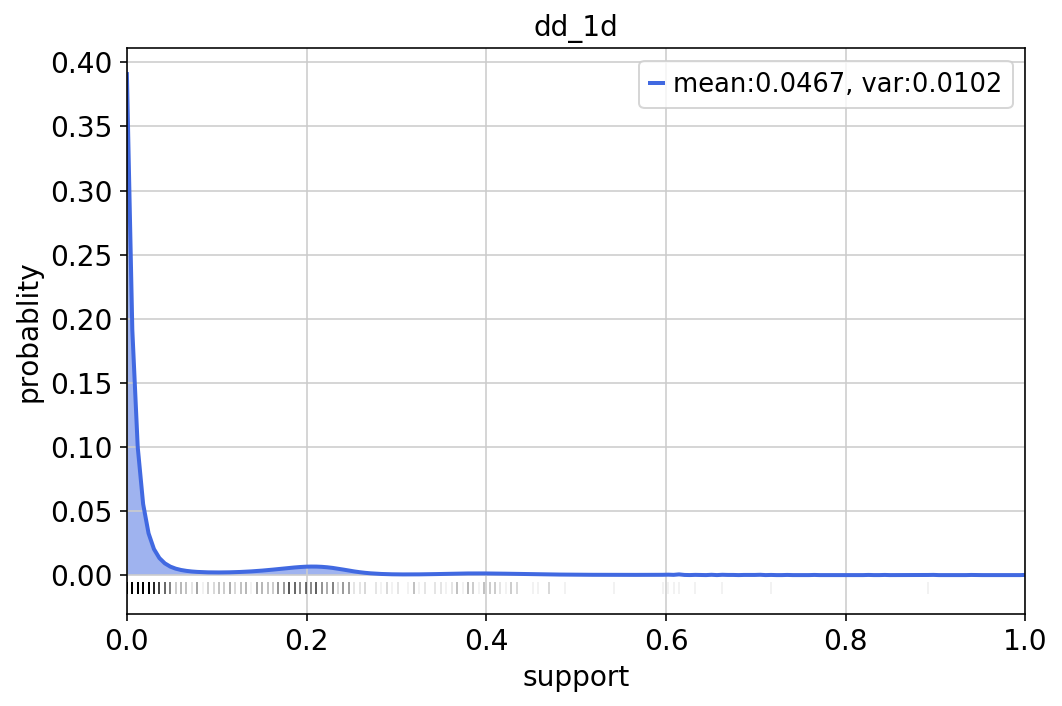

estimated gamma: 301.0
-------------------------------------------------------------------------
S100A4
Average counts per cell = 10.855745137811716


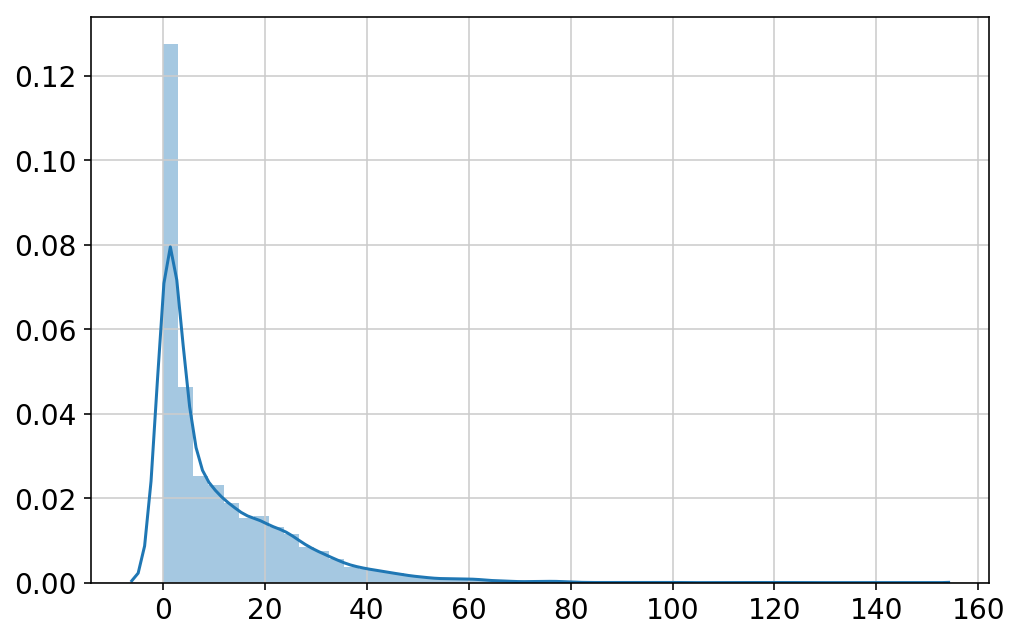

gamma:82
n_degree:7
alpha_hat:  [ 1.51573304  1.44560542  0.99343248 -0.60975235 -0.84591354 -0.96947814
 -1.53186346]
-l:3.3591602988534364, reg:0.0009747990908300587


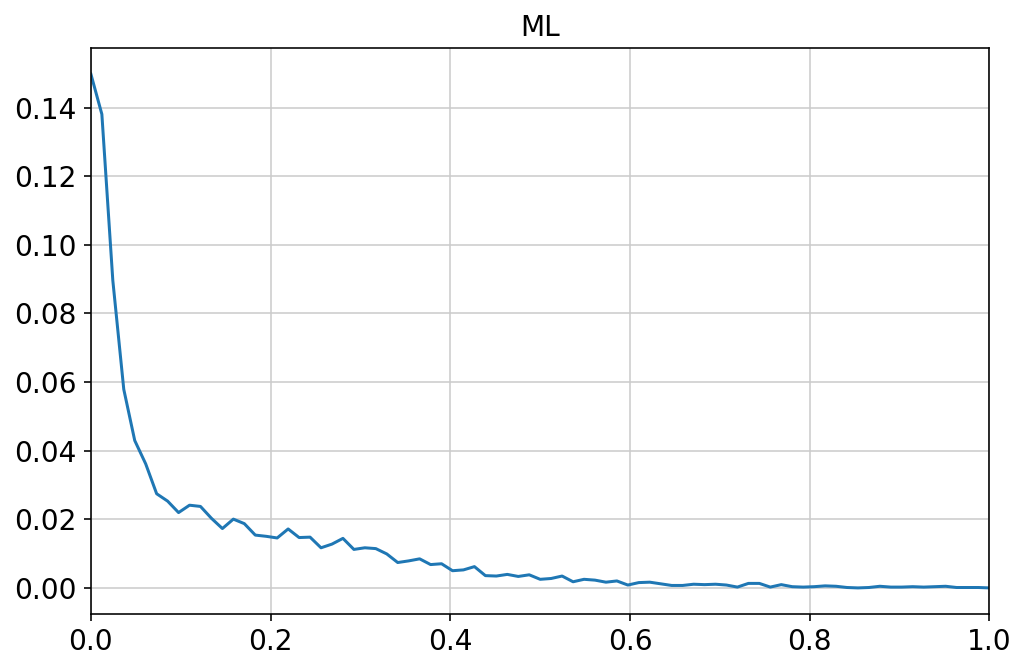

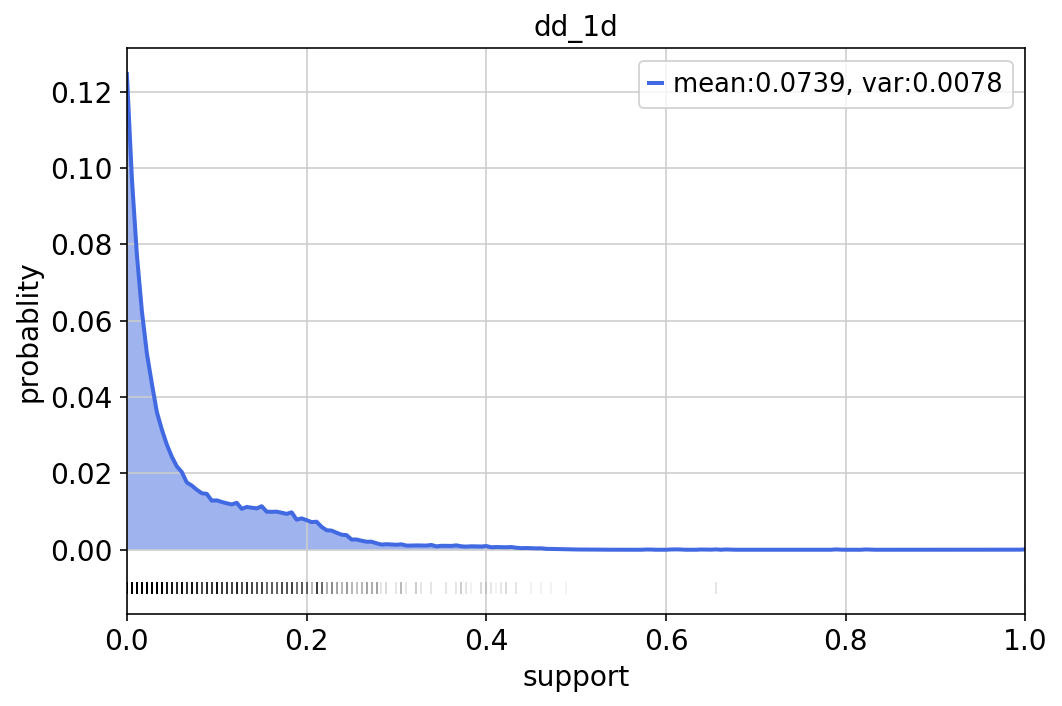

estimated gamma: 148.0
-------------------------------------------------------------------------
LGALS2
Average counts per cell = 1.2554587758024103


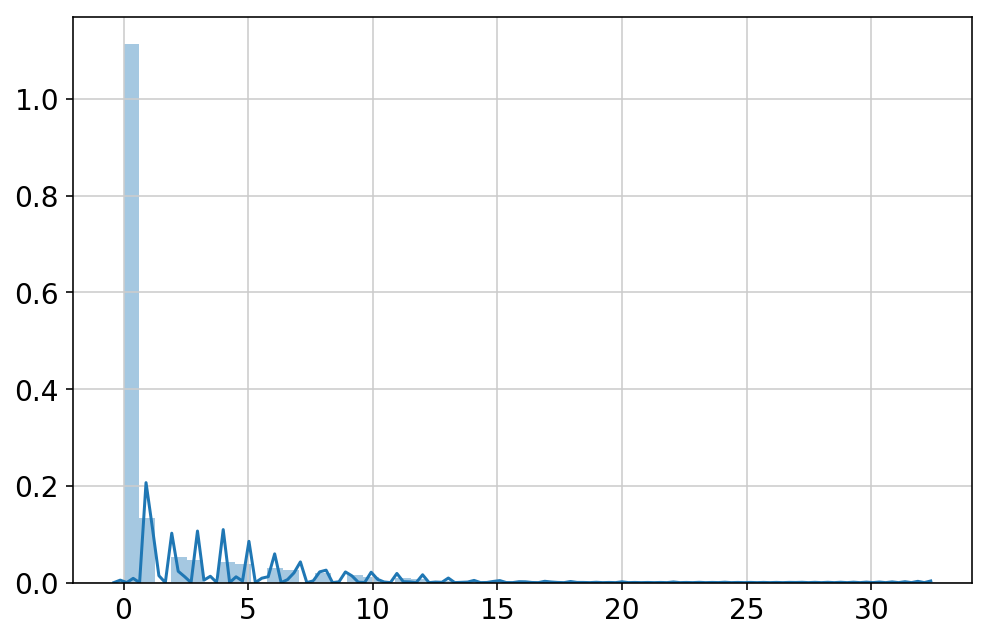

gamma:23
n_degree:7
alpha_hat:  [ 1.54723038  3.27325799  2.37858132 -4.89933019 -1.02286113  0.08080006
 -1.37191846]
-l:1.2687375847948992, reg:0.0045704158855816536


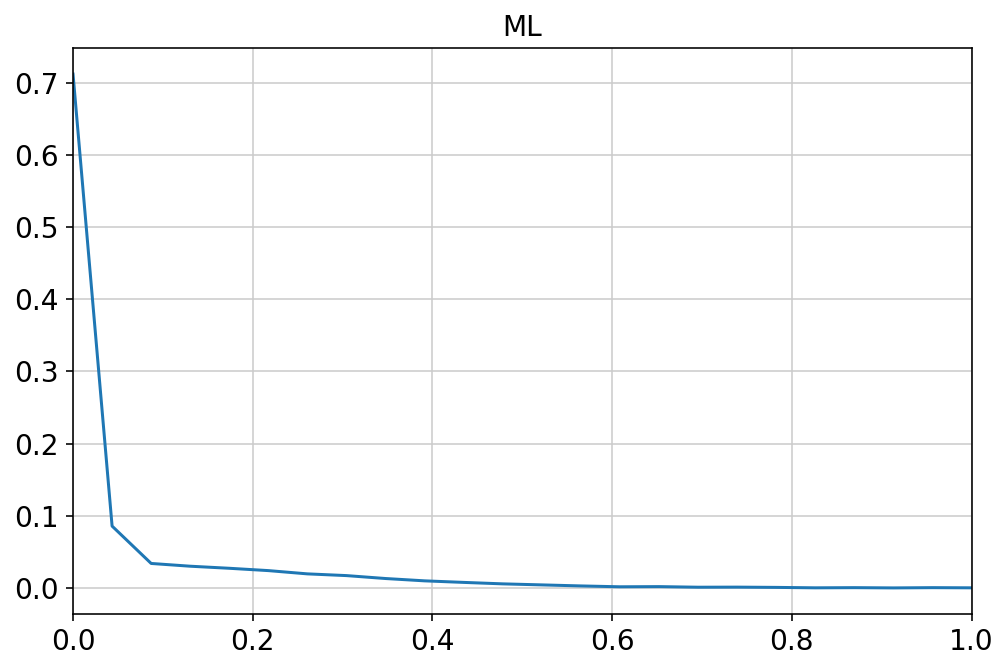

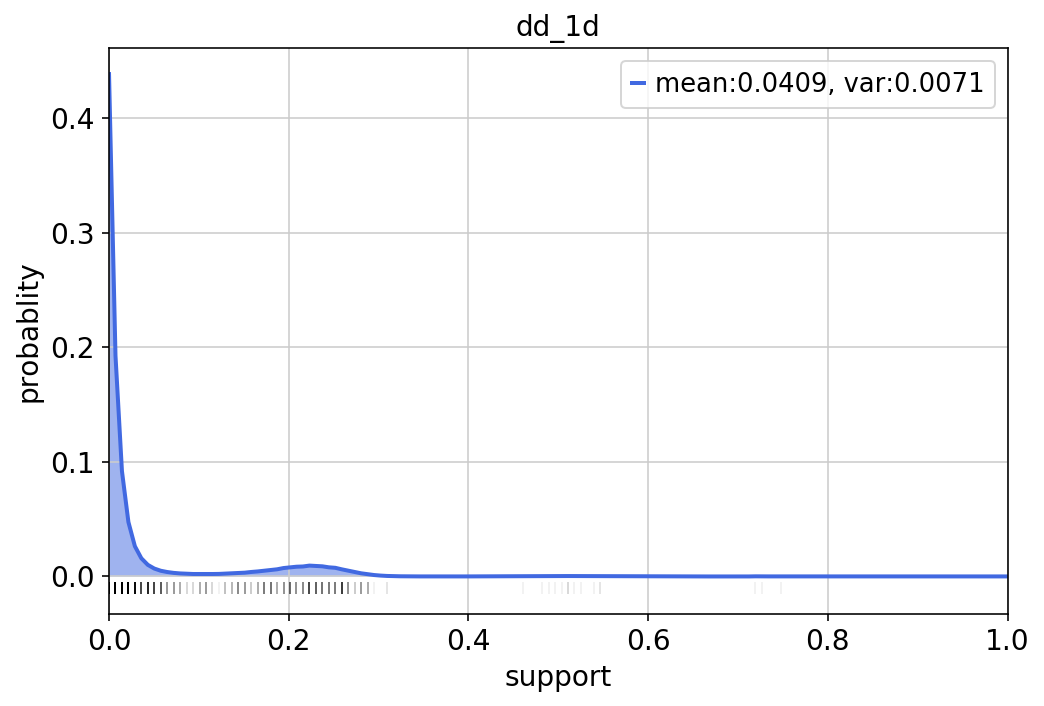

estimated gamma: 32.0
-------------------------------------------------------------------------
FCN1
Average counts per cell = 2.1746808256771266


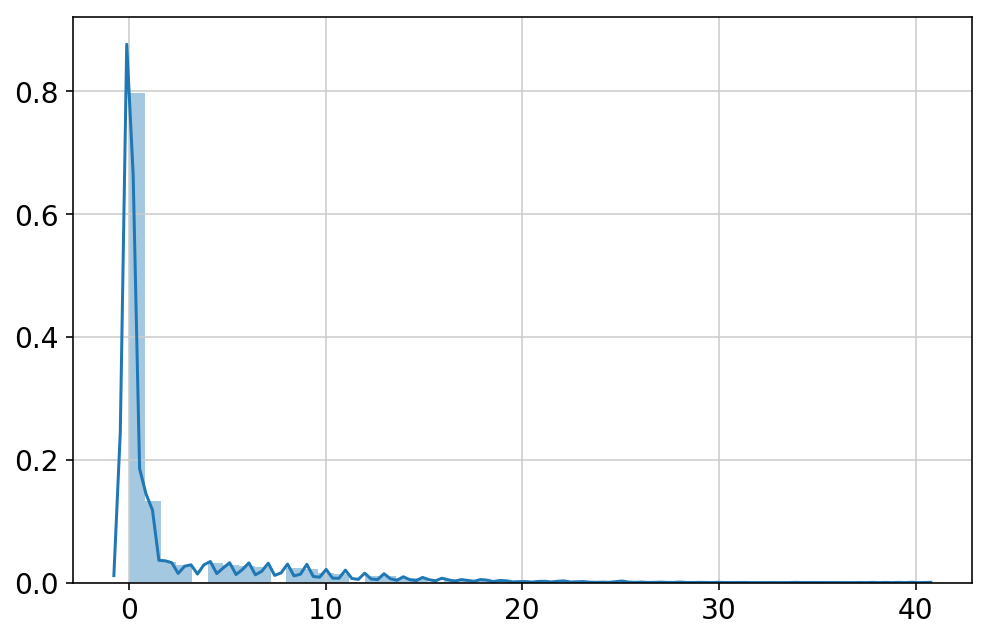

gamma:33
n_degree:7
alpha_hat:  [ 1.56899371  3.1648716   1.9321969  -5.88873753  0.05212959  0.88679375
 -1.71780103]
-l:1.6151209089837102, reg:0.00546287290659135


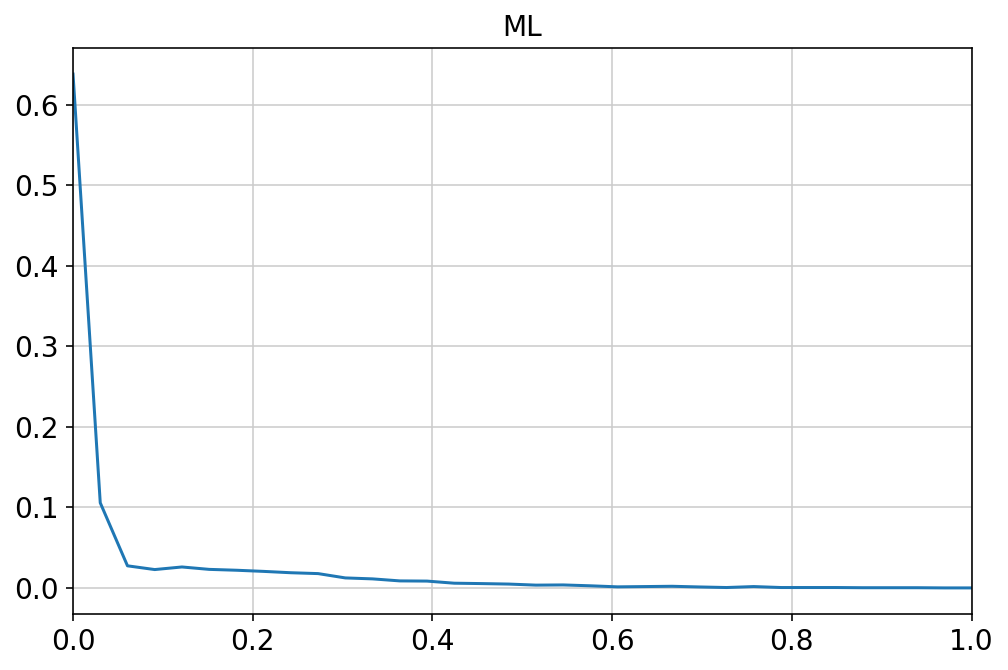

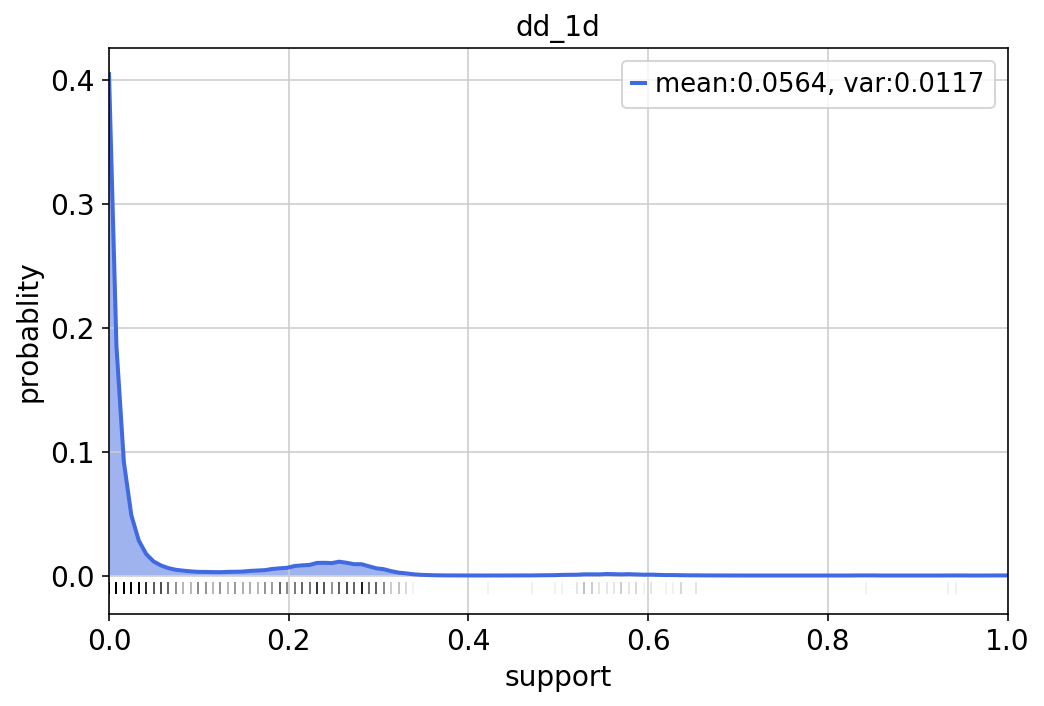

estimated gamma: 40.0
-------------------------------------------------------------------------
CD14
Average counts per cell = 0.6564849063357595


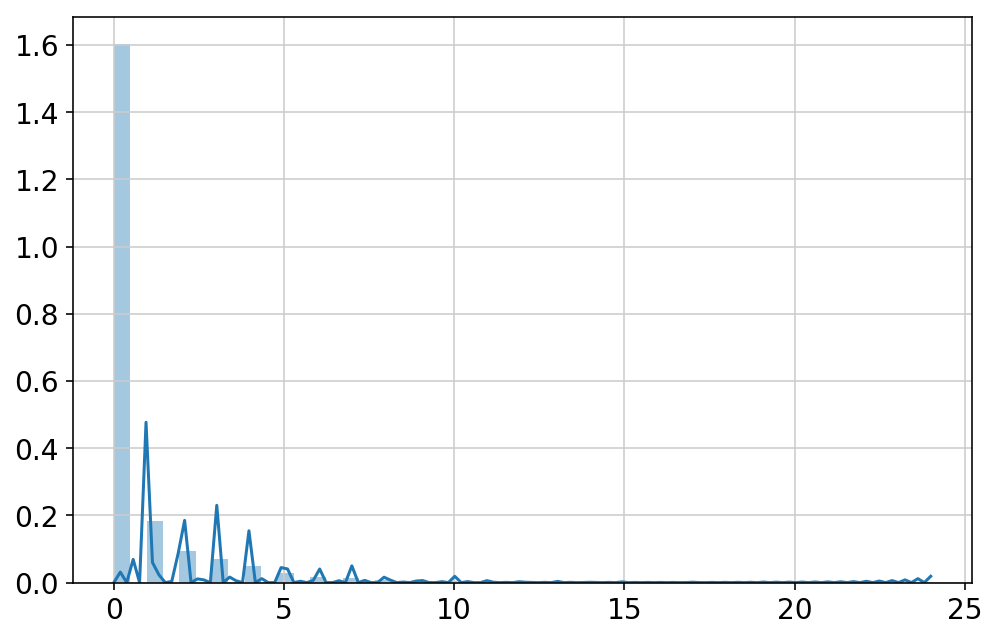

gamma:16
n_degree:7
alpha_hat:  [ 1.83052818  2.99578321  2.1226266  -3.89915286 -1.3269959  -0.34104125
 -1.38907718]
-l:0.9670904838023987, reg:0.0035841249794123175


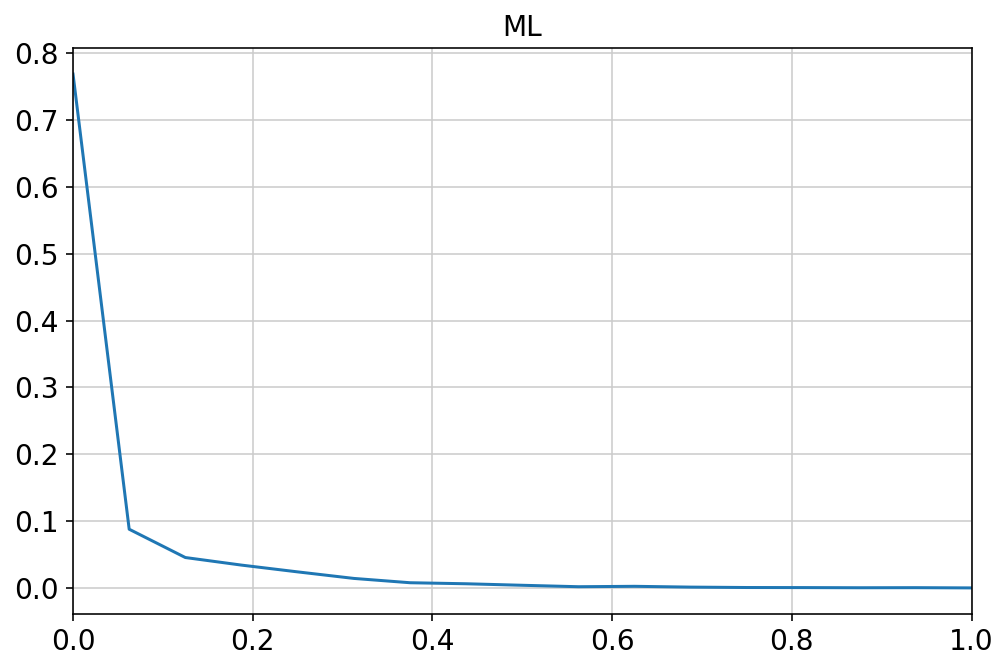

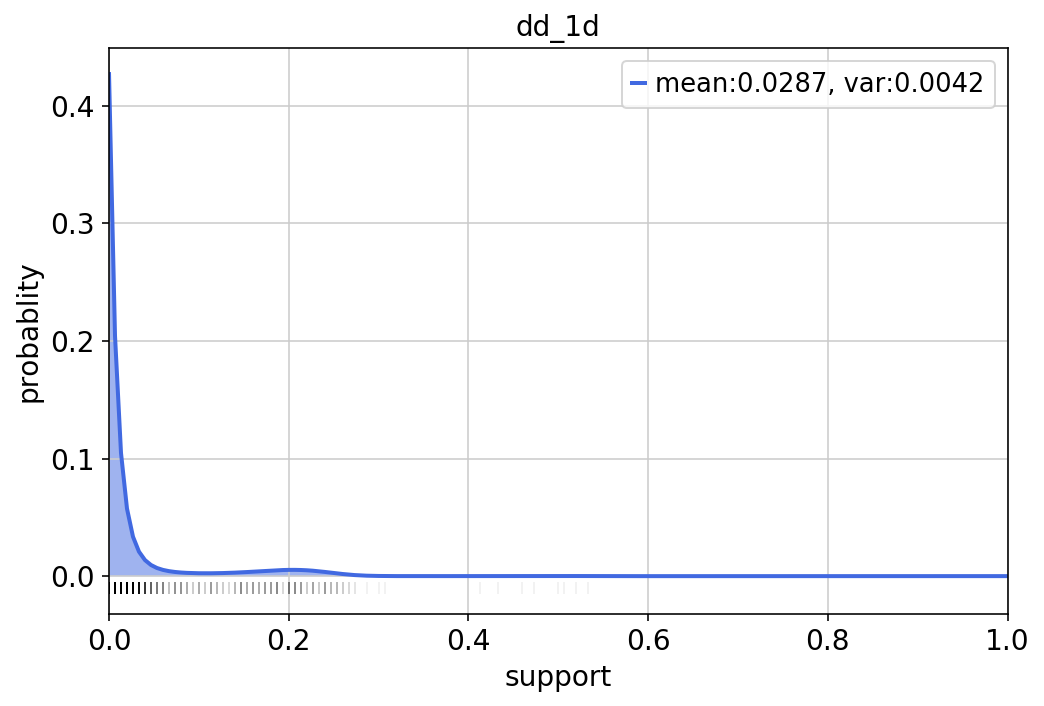

estimated gamma: 24.0
-------------------------------------------------------------------------
GZMB
Average counts per cell = 0.46116215248777


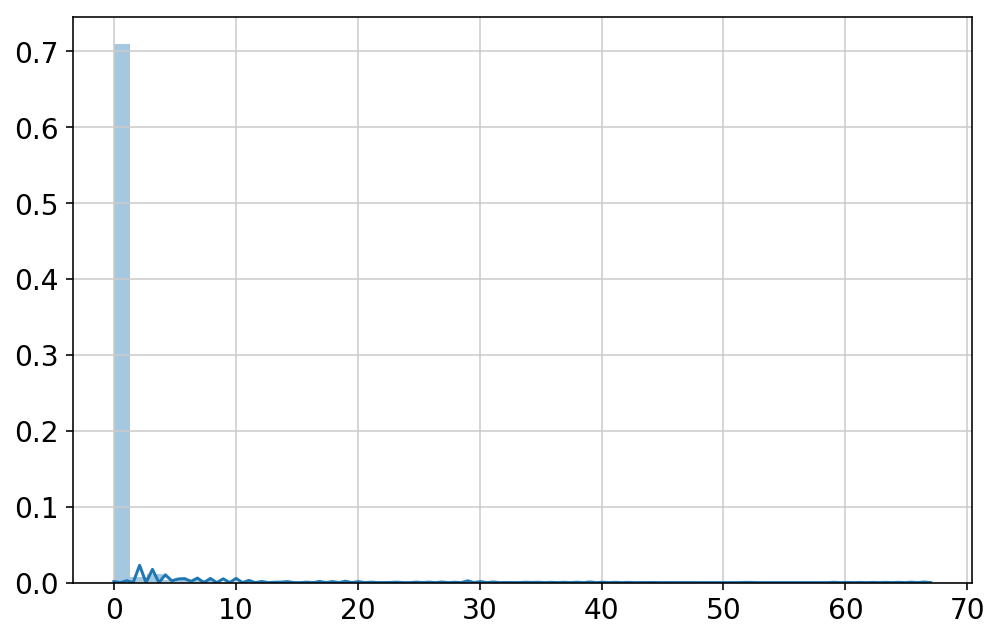

gamma:19
n_degree:7
alpha_hat:  [-0.86780487  2.27524184  3.21380544 -3.03096509 -0.94013192 -0.05706954
 -0.60055228]
-l:0.47370437494463885, reg:0.0026692873488455846


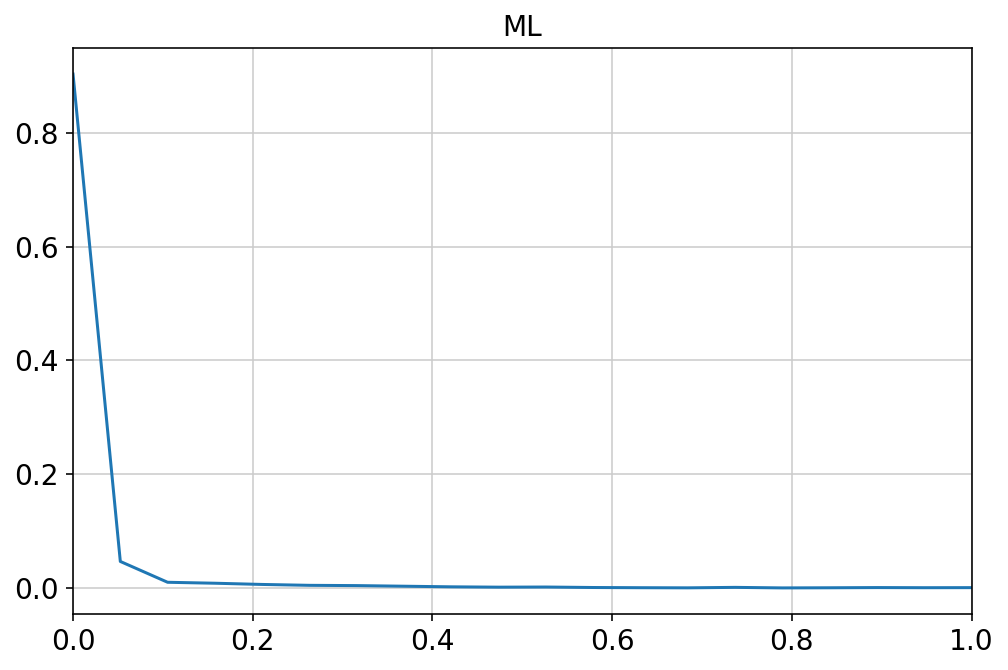

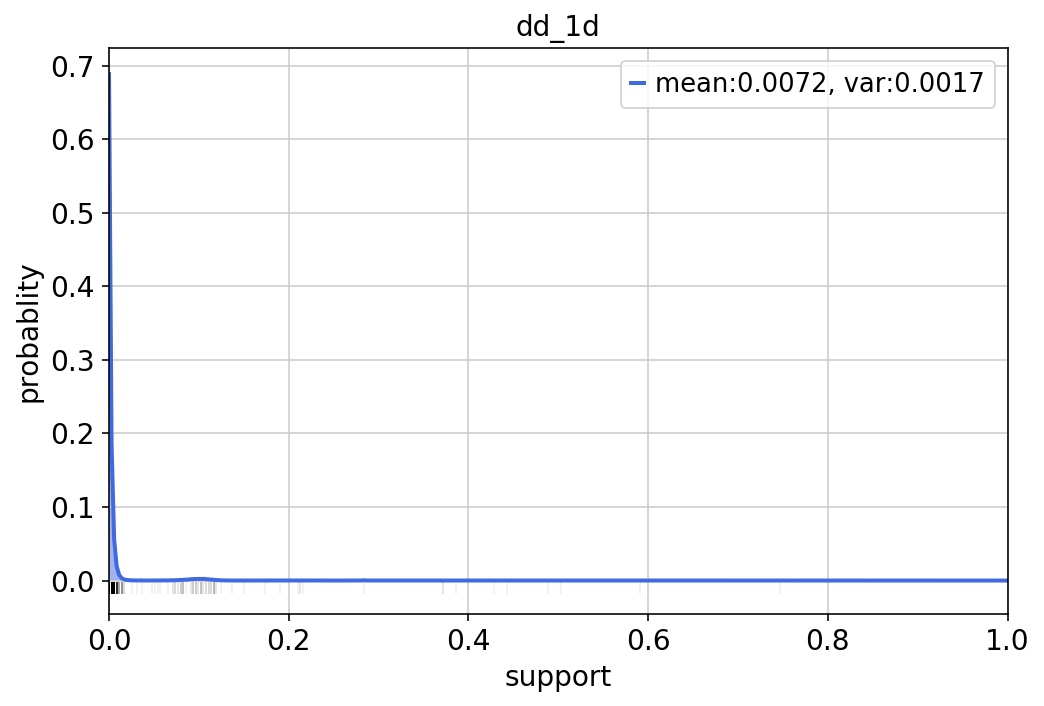

estimated gamma: 67.0
-------------------------------------------------------------------------
IGFBP7
Average counts per cell = 0.09760171817205585


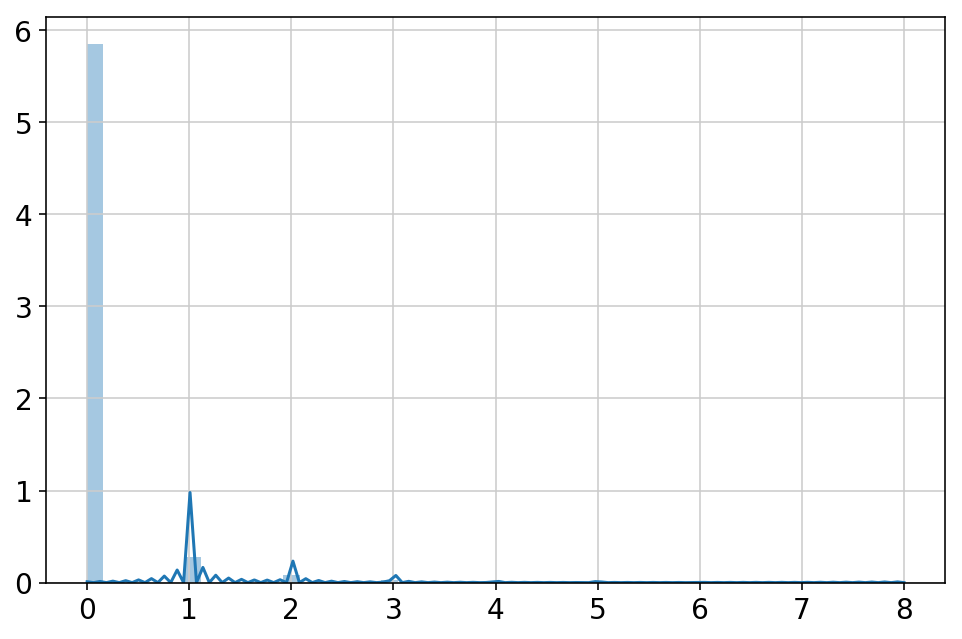

gamma:6
n_degree:7
alpha_hat:  [ 0.12766482  1.35633404  1.99189274 -0.6647622  -1.17668125 -0.49356178
 -1.14116066]
-l:0.2989556849994692, reg:0.0009195915439680271


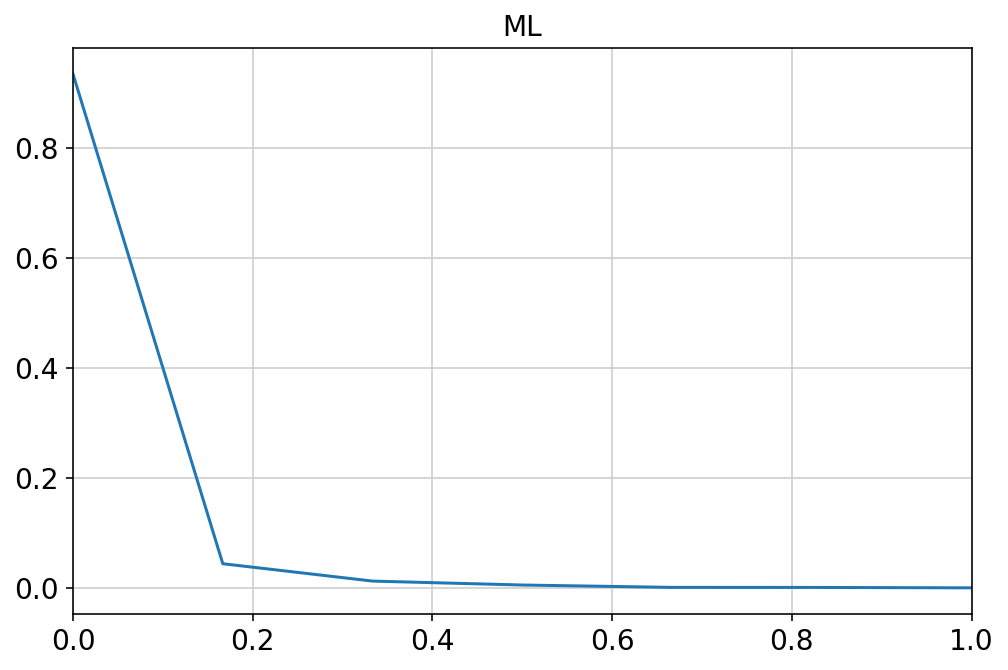

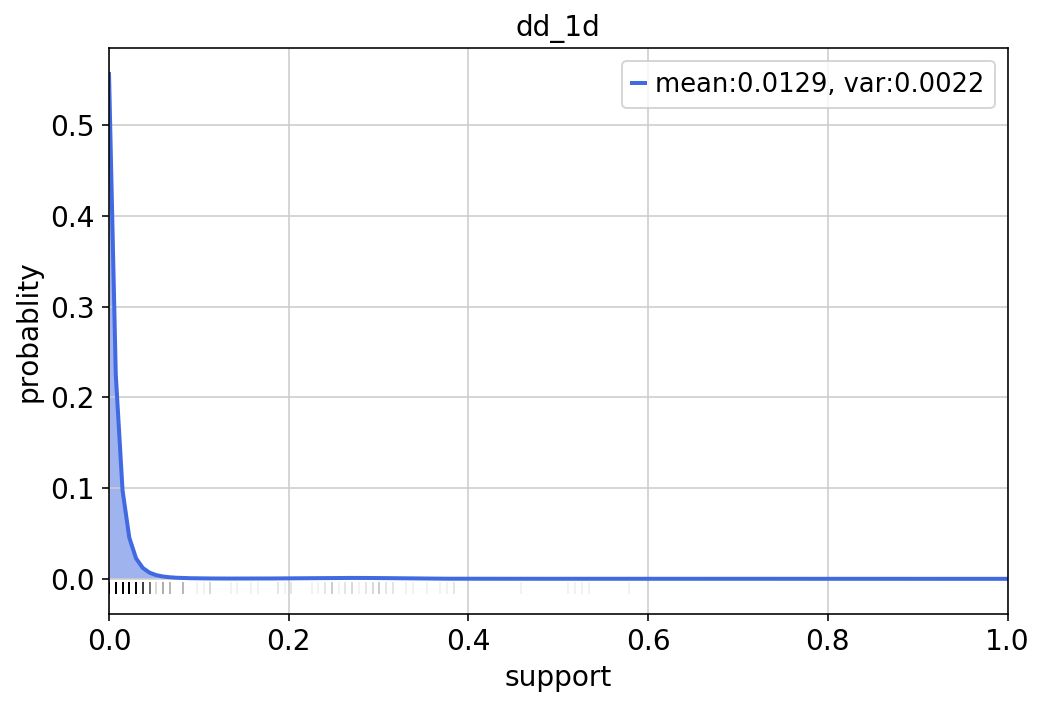

estimated gamma: 8.0
-------------------------------------------------------------------------
CD79A
Average counts per cell = 1.003937477627968


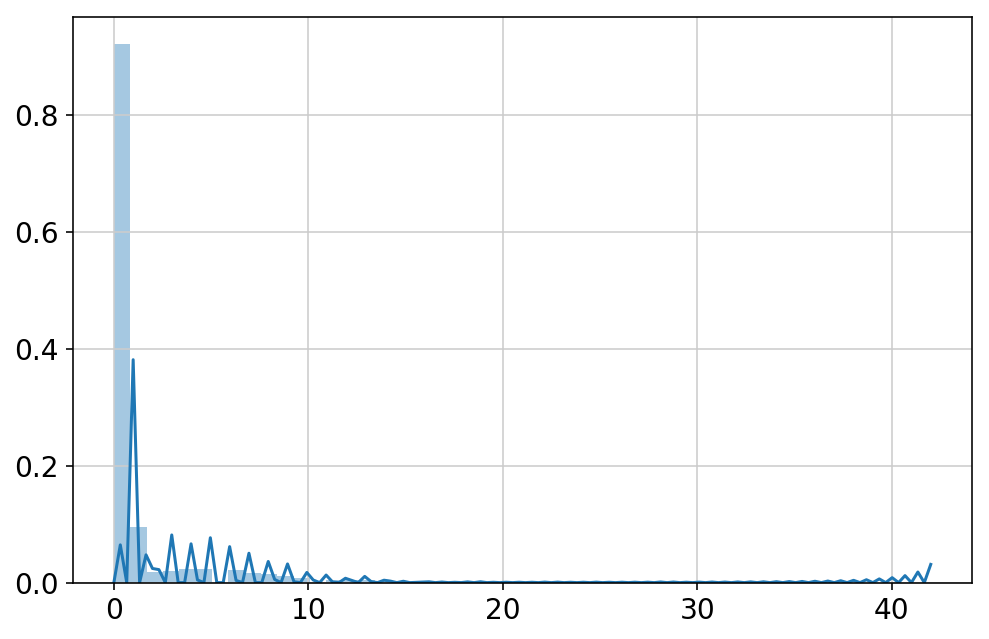

gamma:22
n_degree:7
alpha_hat:  [ 0.91308507  3.43364593  3.18763551 -4.29819756 -1.33557817 -0.34247568
 -1.5732626 ]
-l:1.0459994026004478, reg:0.004563538496862171


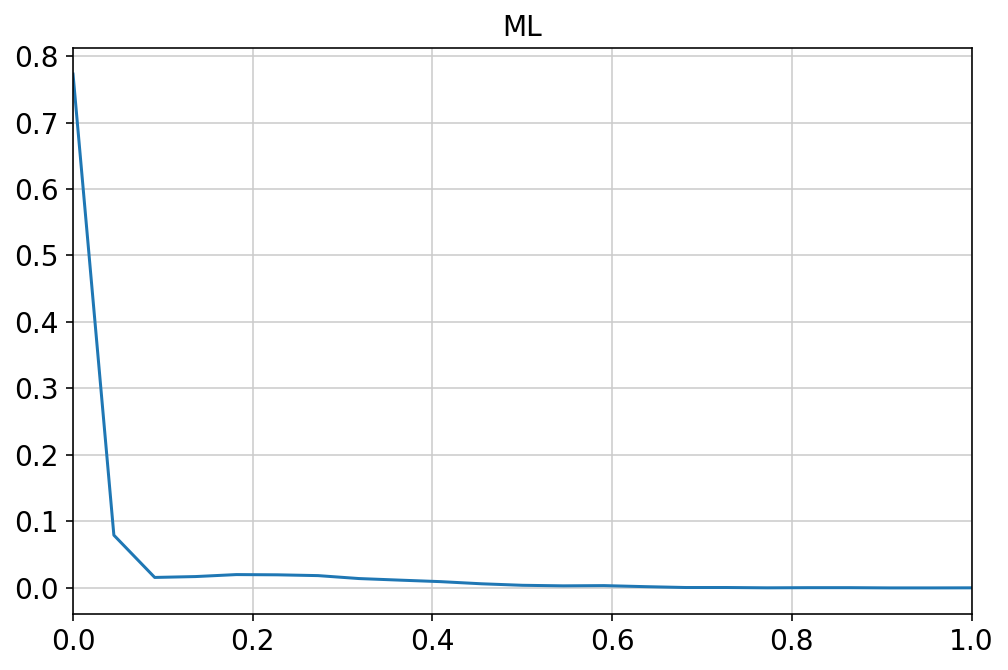

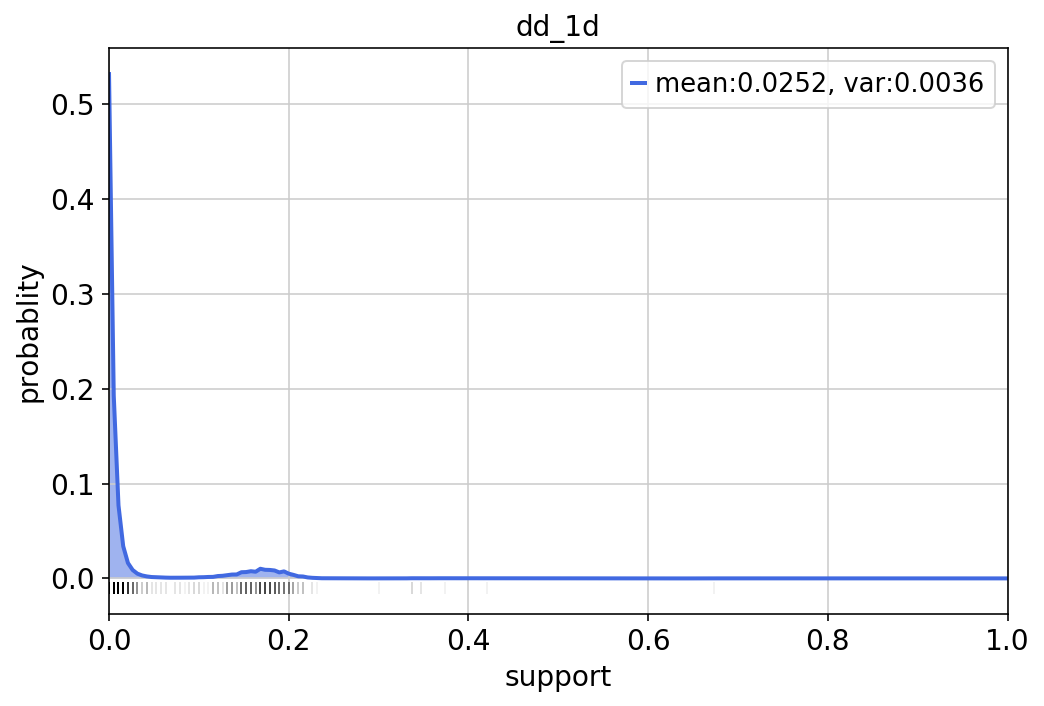

estimated gamma: 42.0
-------------------------------------------------------------------------
CD3E
Average counts per cell = 1.6037465696217634


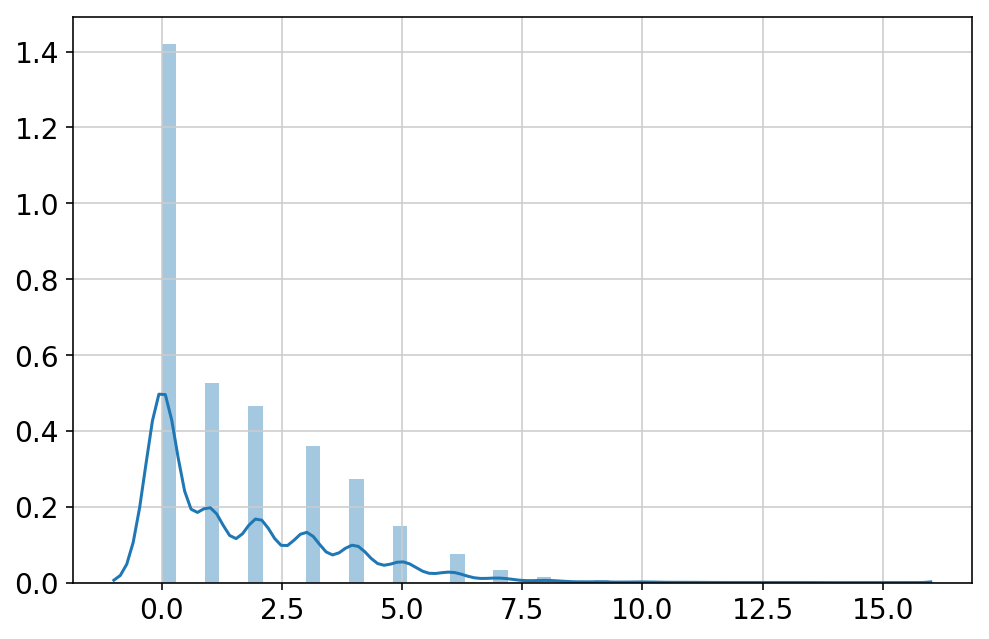

gamma:14
n_degree:7
alpha_hat:  [ 3.74228258  3.70381614  1.58817286 -4.4474252  -1.84356024 -0.83430382
 -1.90955416]
-l:1.7091778565147784, reg:0.005776599119846052


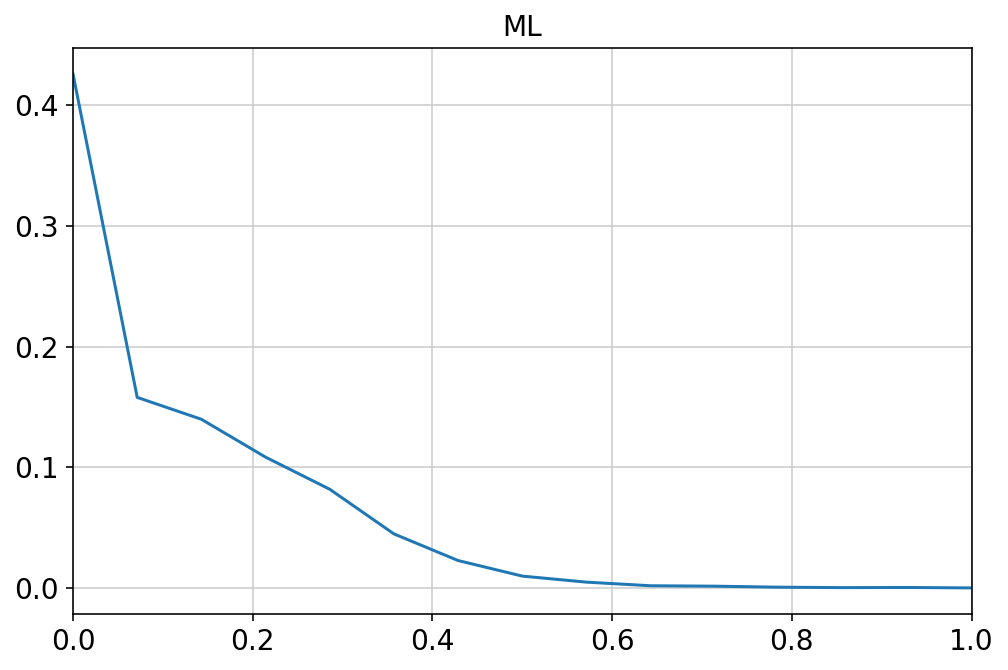

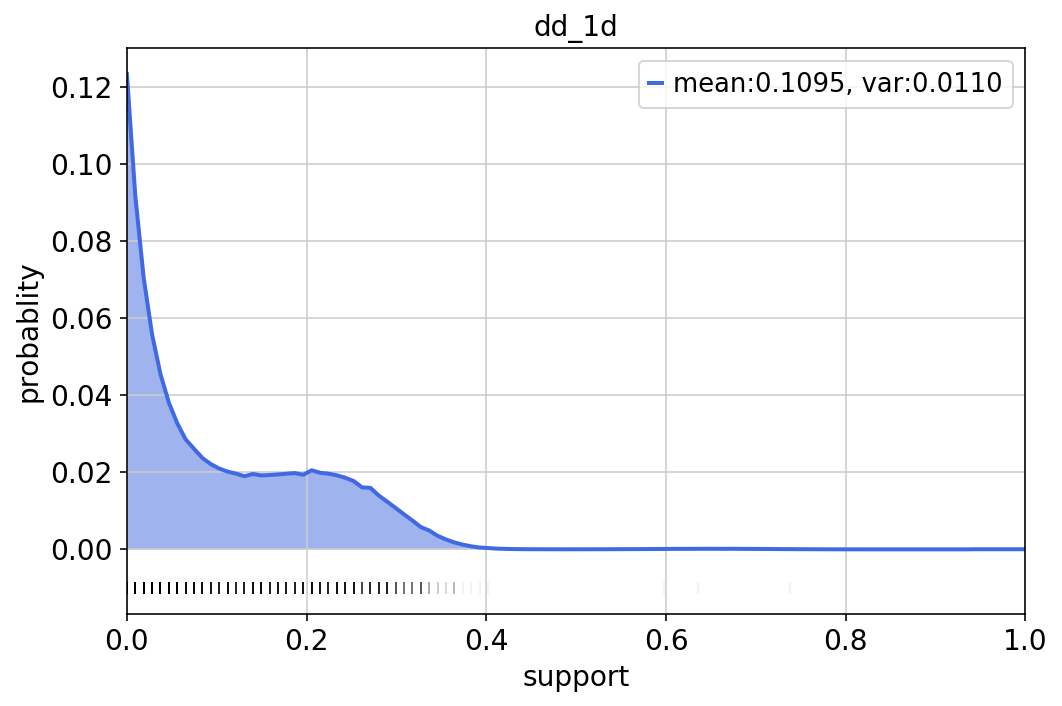

estimated gamma: 15.0
-------------------------------------------------------------------------
LYZ
Average counts per cell = 17.511156186612578


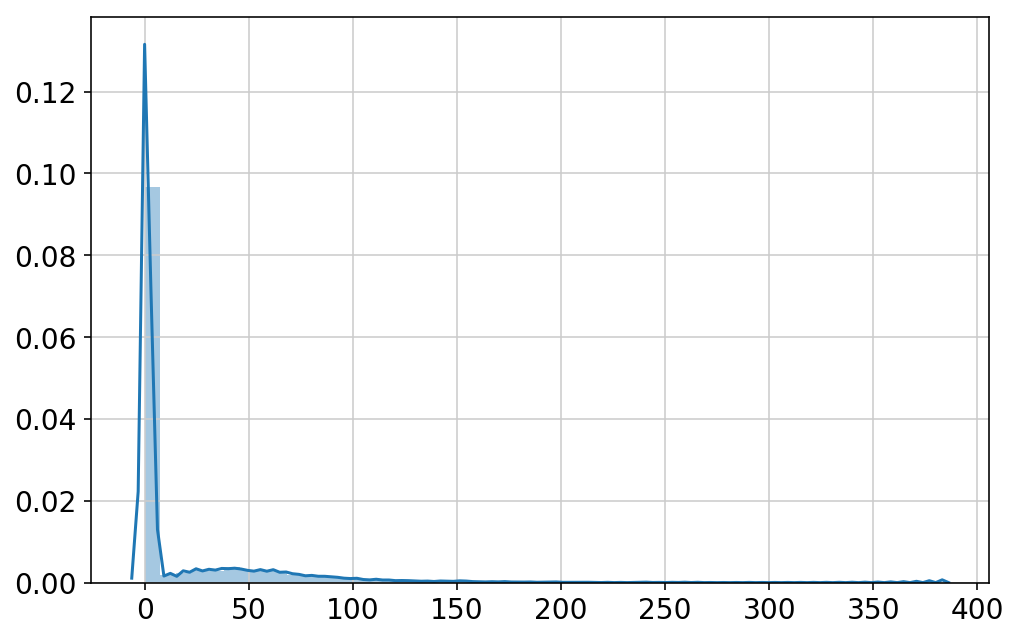

gamma:200
n_degree:7
alpha_hat:  [ 0.36739941  1.79354558  1.78498804 -2.42321413  0.15621278 -0.10129313
 -1.58024429]
-l:3.1645229152964554, reg:0.0014941771834090275


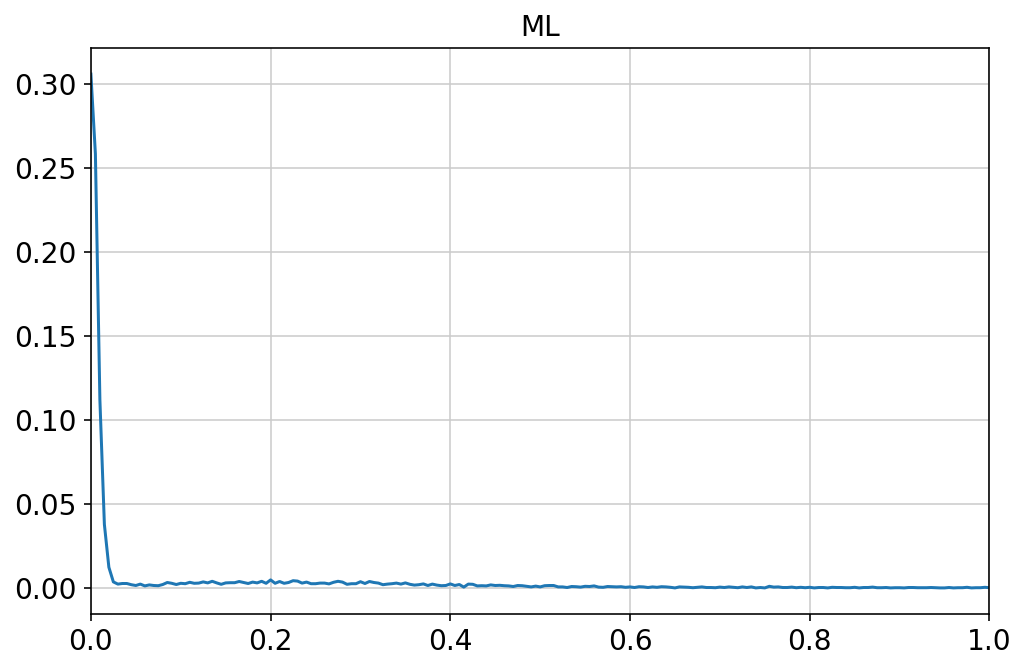

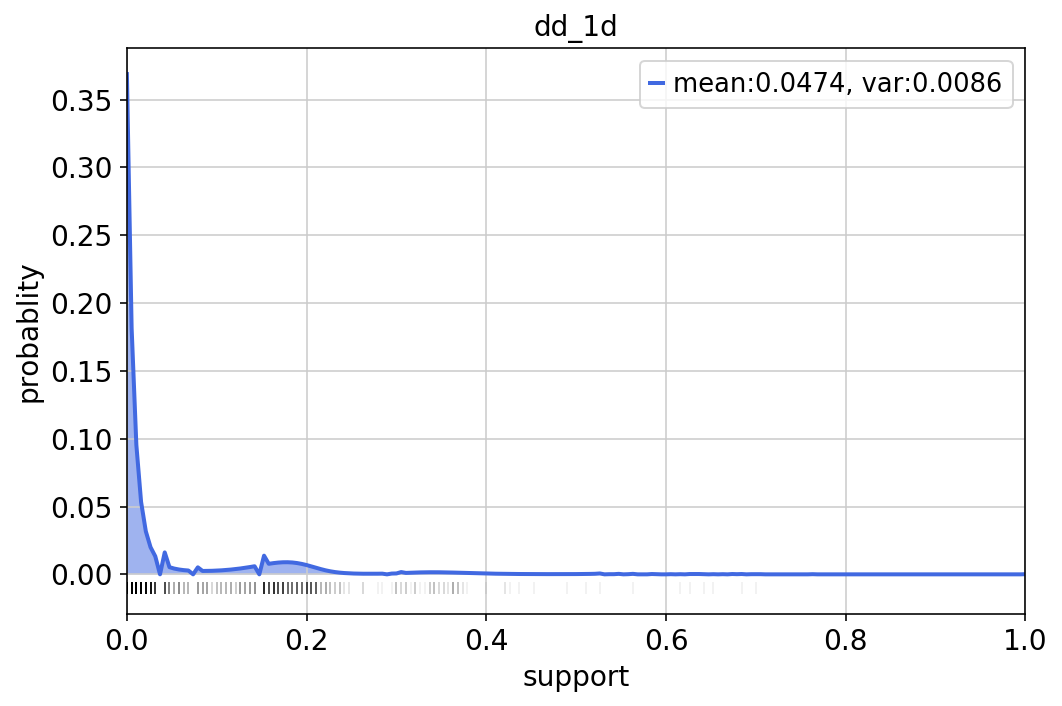

estimated gamma: 380.0
-------------------------------------------------------------------------
MS4A1
Average counts per cell = 0.65481446128147


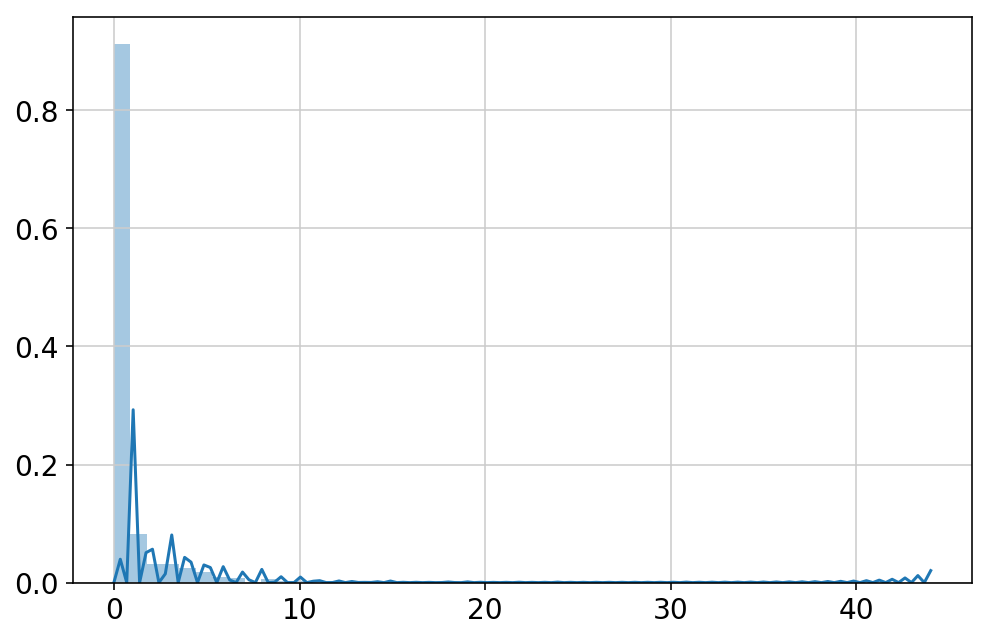

gamma:18
n_degree:7
alpha_hat:  [ 1.48287323  3.34341238  2.63920871 -4.58164227 -1.28772641 -0.22871013
 -1.3771483 ]
-l:0.8904953128677051, reg:0.004494127285323275


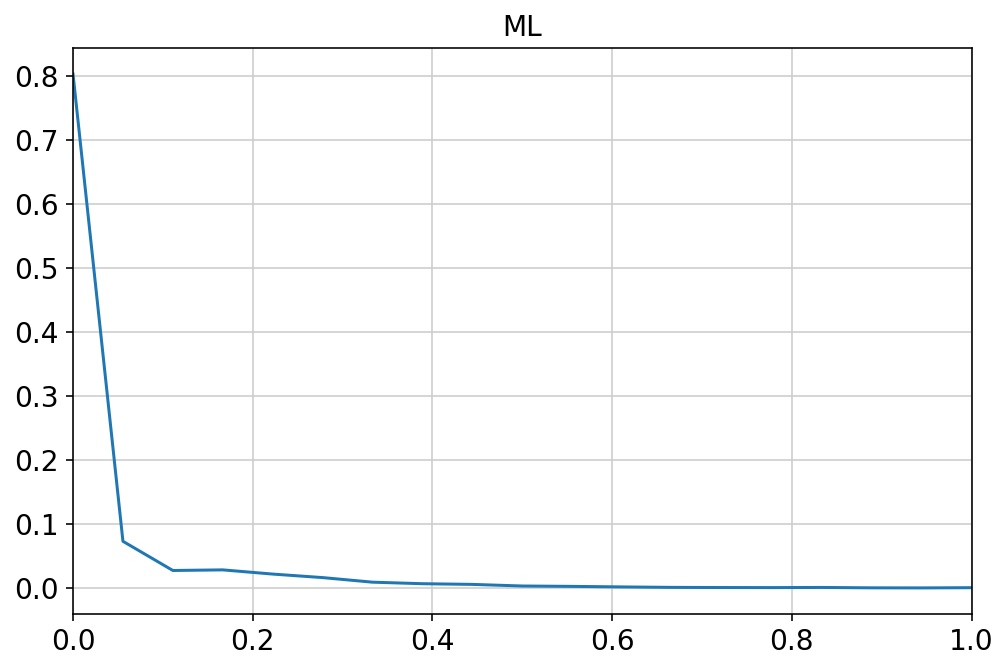

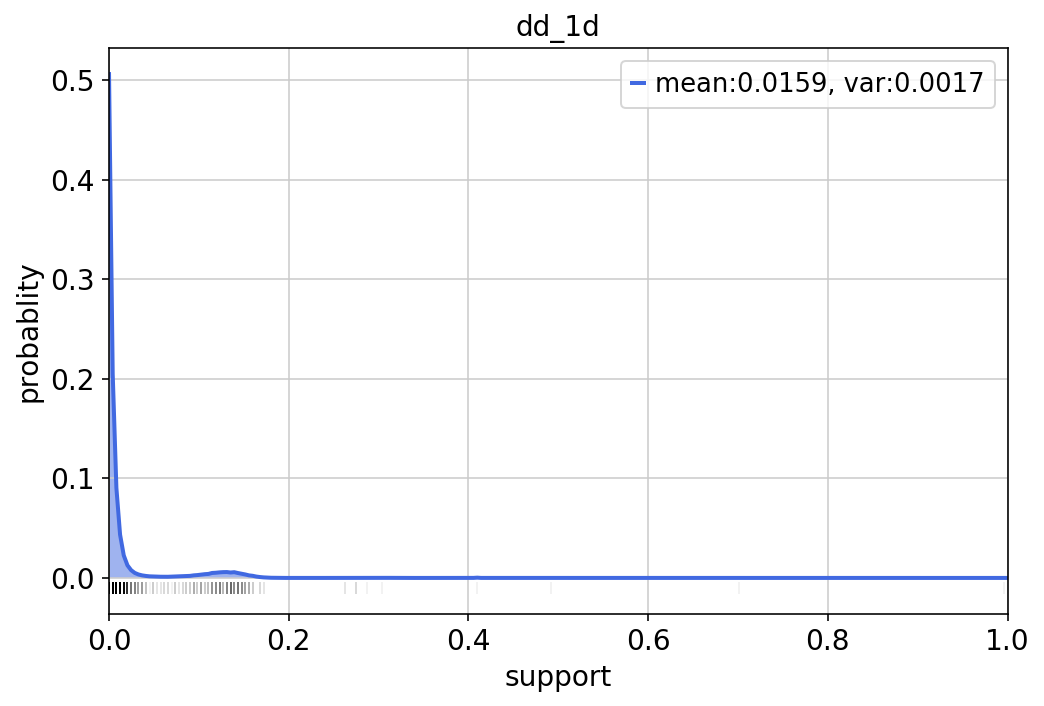

estimated gamma: 44.0
-------------------------------------------------------------------------
GNLY
Average counts per cell = 1.9725569741081017


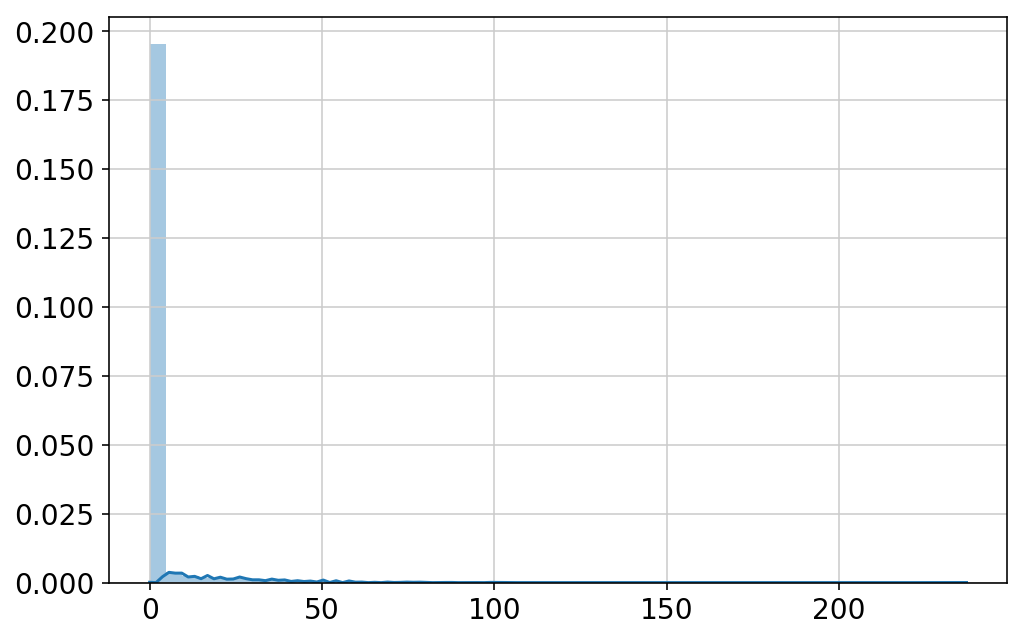

gamma:61
n_degree:7
alpha_hat:  [-0.81071761  1.90226735  2.25503348 -4.40258962  0.3790678   1.08443571
 -0.47411309]
-l:1.0776181655467088, reg:0.0030288331963803073


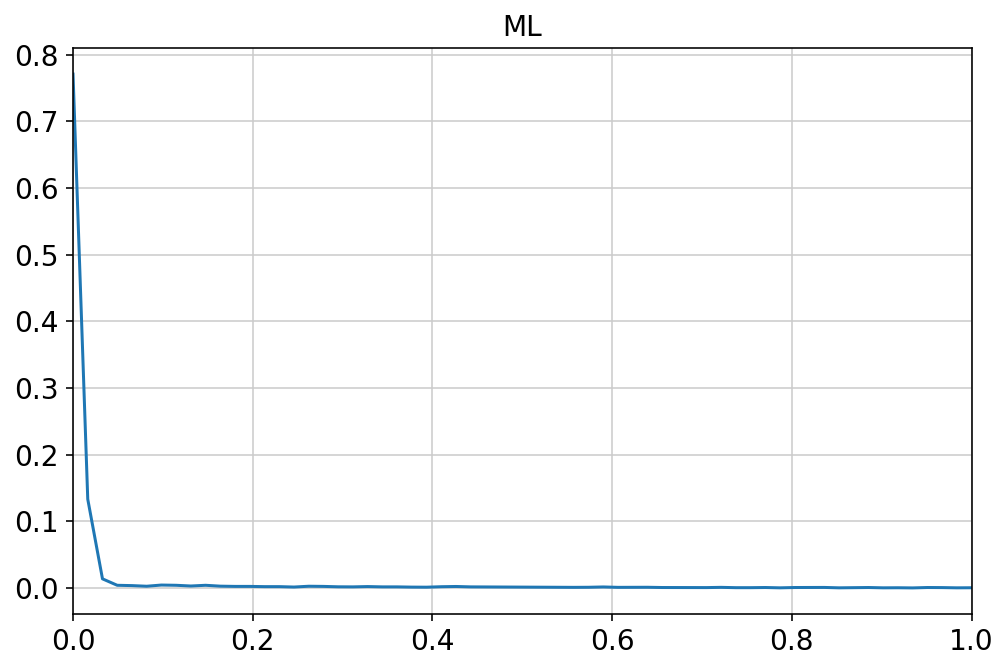

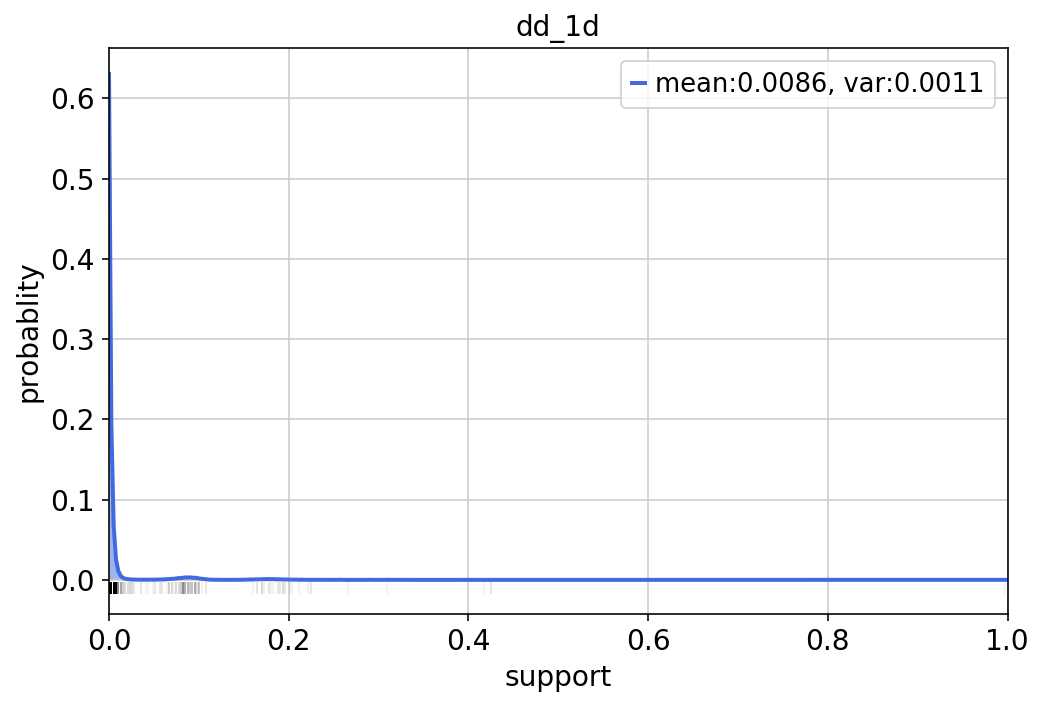

estimated gamma: 237.0
-------------------------------------------------------------------------
FGFBP2
Average counts per cell = 0.2930437895239232


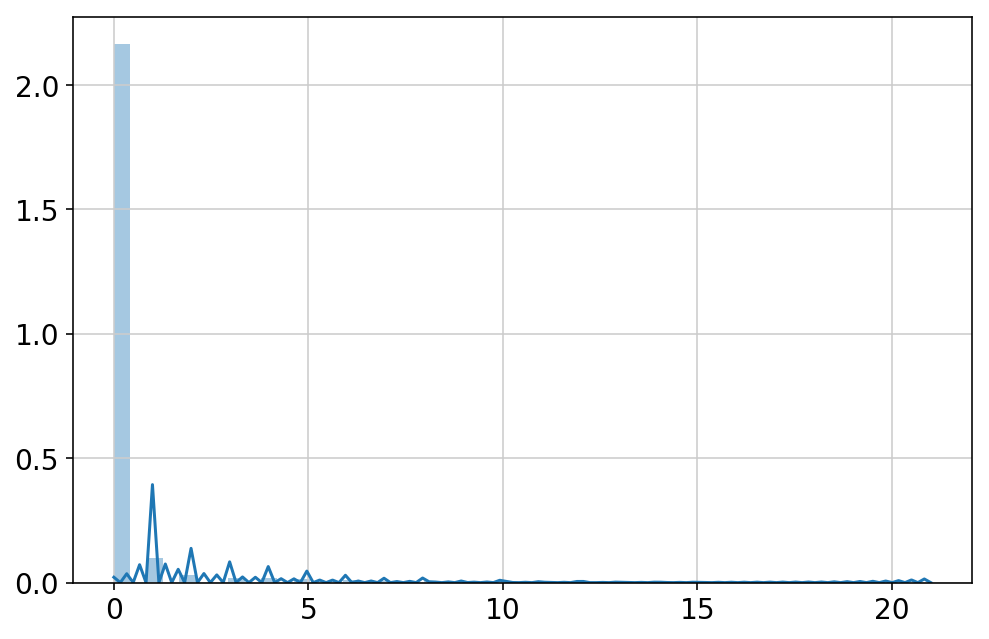

gamma:14
n_degree:7
alpha_hat:  [-1.40415854  1.61776413  3.01104541 -1.74393868 -0.75369023  0.03695181
 -0.76643555]
-l:0.4719890823029377, reg:0.0017853376385822508


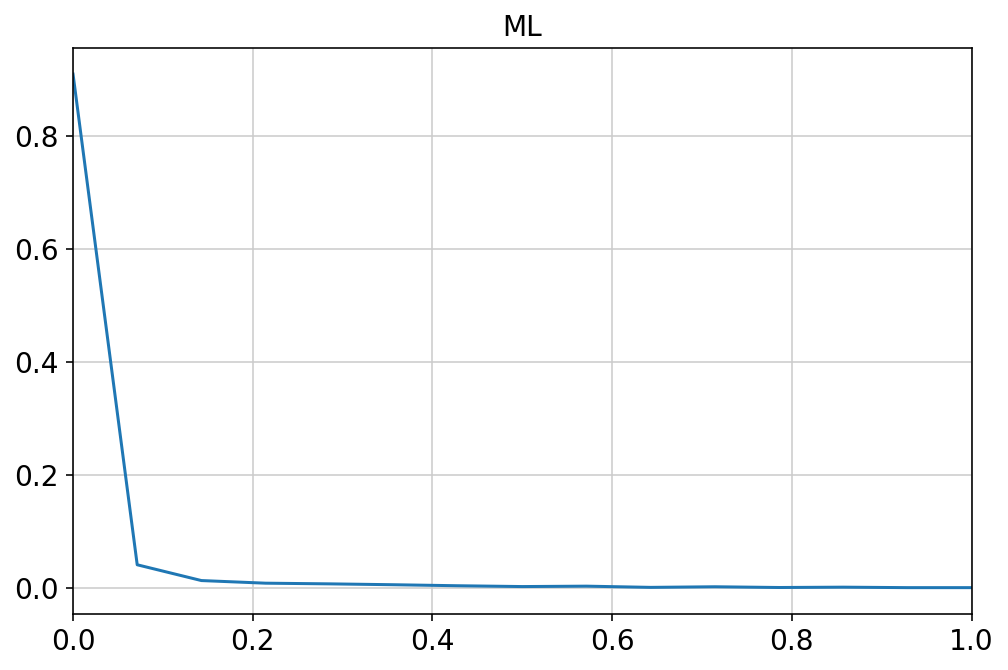

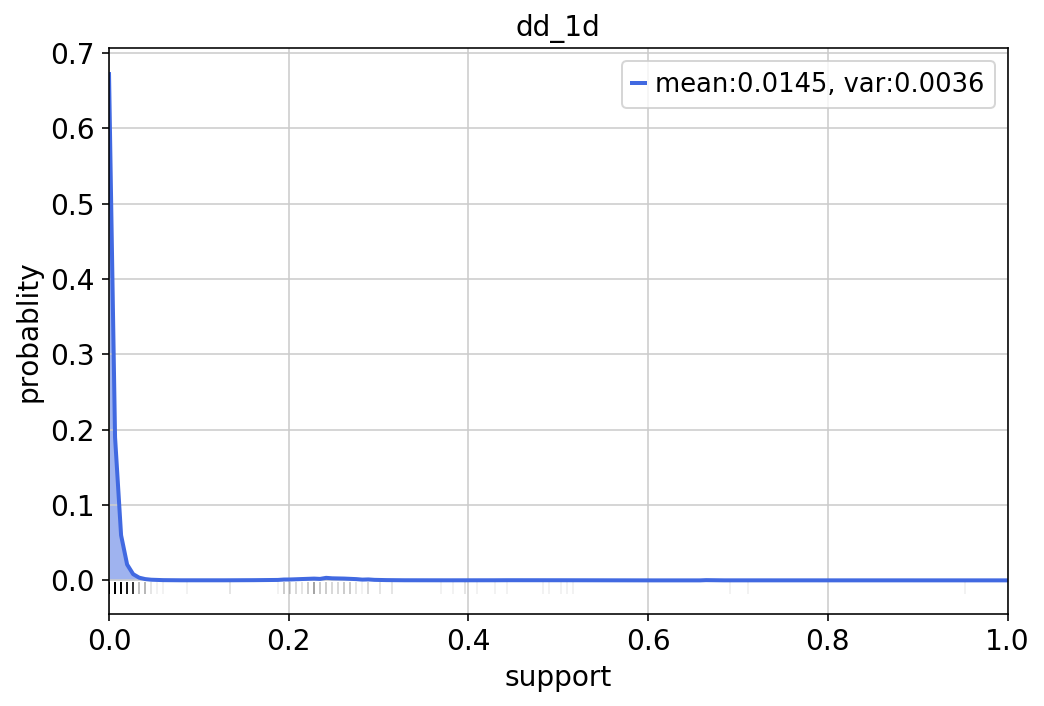

estimated gamma: 21.0
-------------------------------------------------------------------------
FCER1G
Average counts per cell = 2.8796086385872806


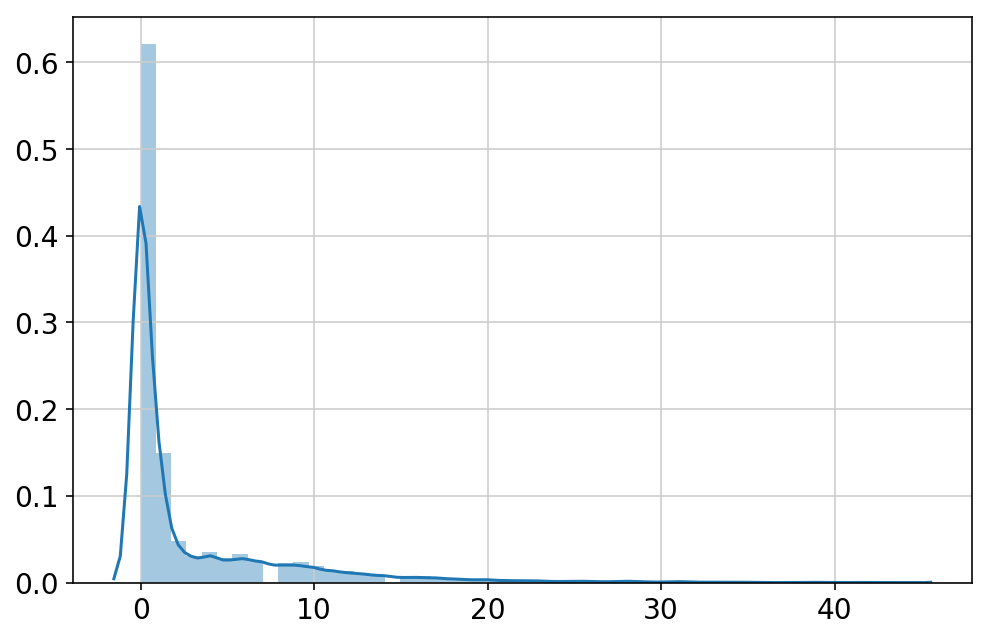

gamma:40
n_degree:7
alpha_hat:  [ 1.98312714  2.91801399  1.37863169 -5.69496777  0.21155101  0.91003997
 -1.70826319]
-l:1.9210080511792929, reg:0.005057197172808255


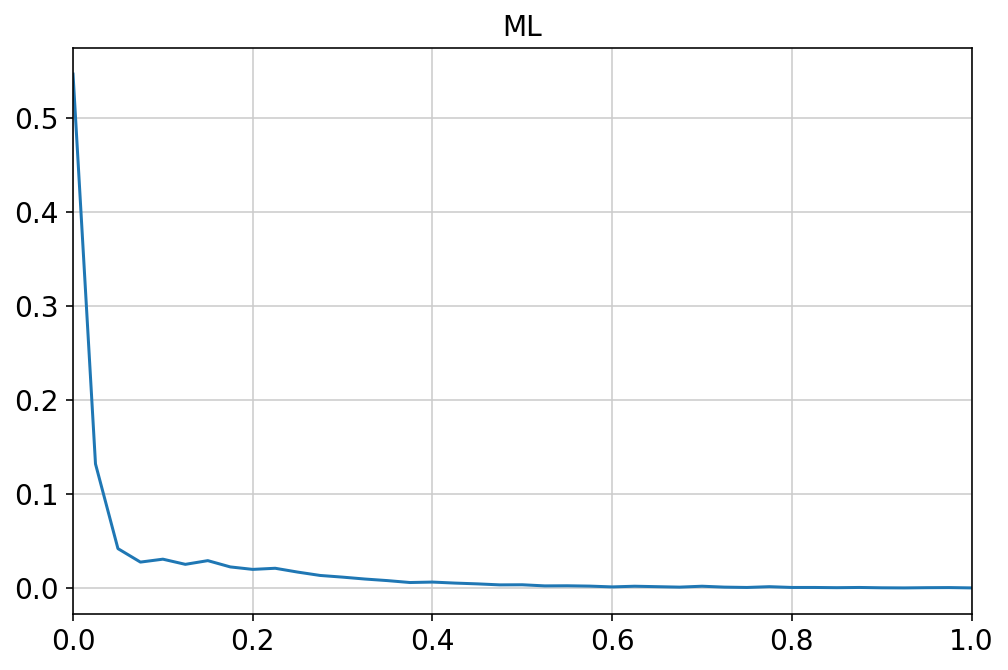

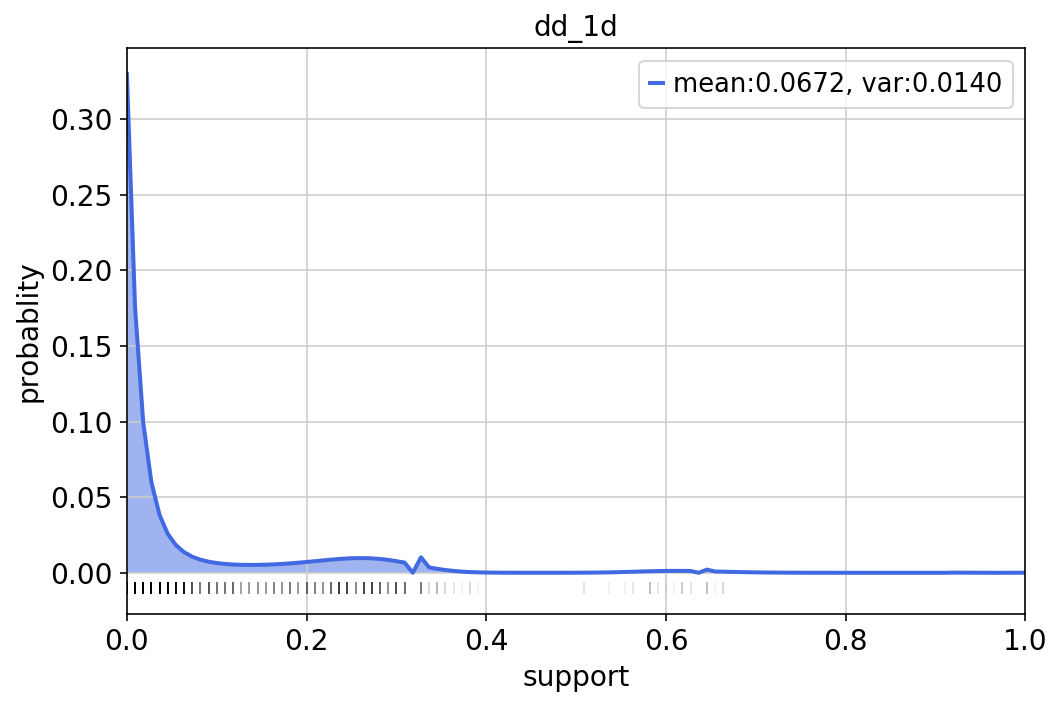

estimated gamma: 44.0
-------------------------------------------------------------------------
LDHB
Average counts per cell = 2.5530366304736907


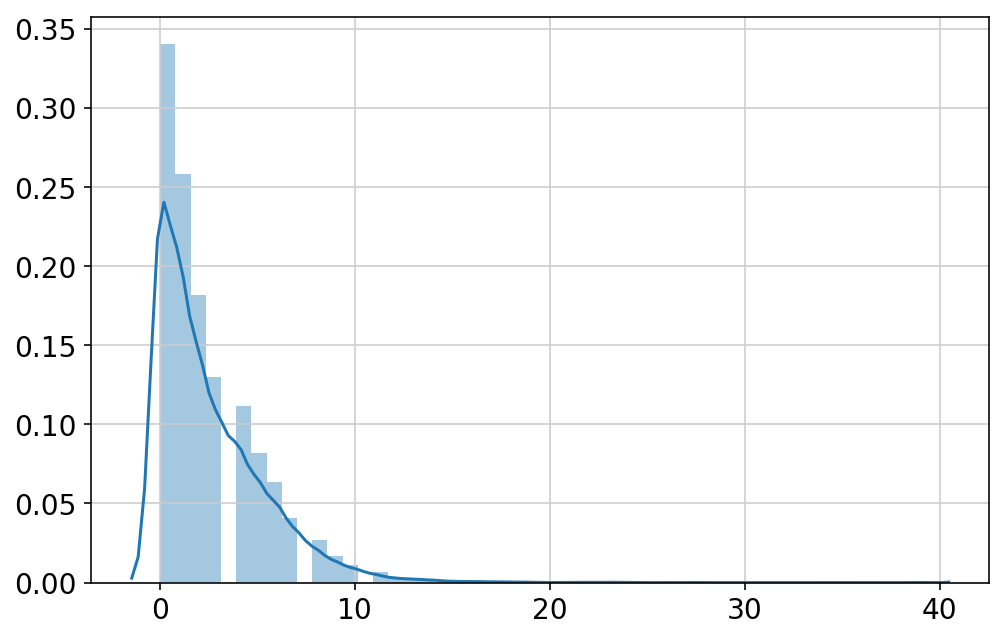

gamma:22
n_degree:7
alpha_hat:  [ 3.11466623  2.17240983  0.74416912 -1.34835958 -1.88934731 -1.01325387
 -1.78096665]
-l:2.1003766269567614, reg:0.0024560530350348


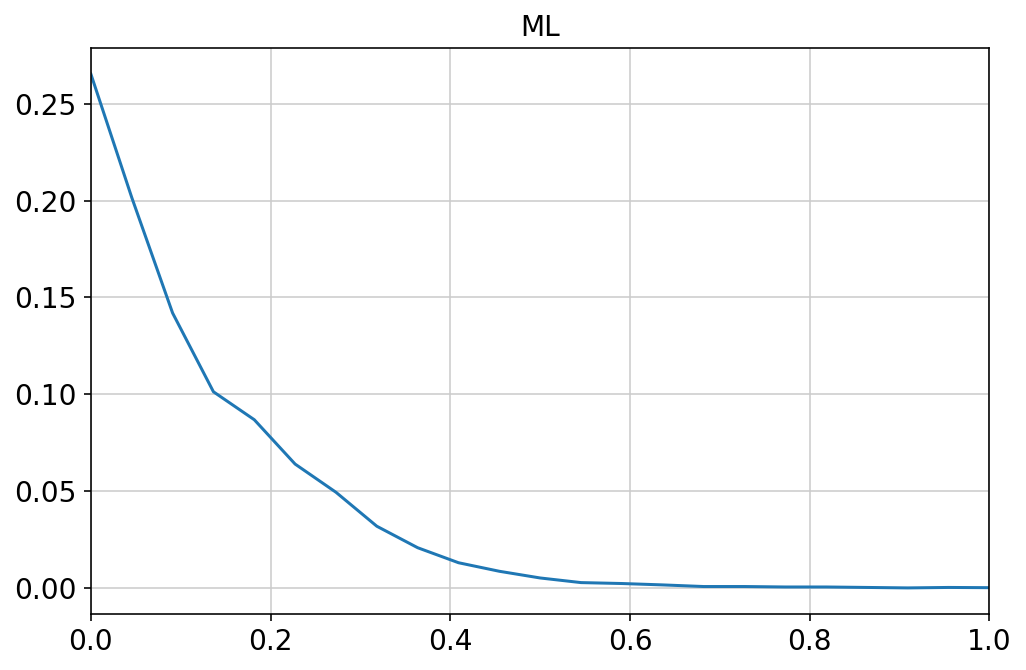

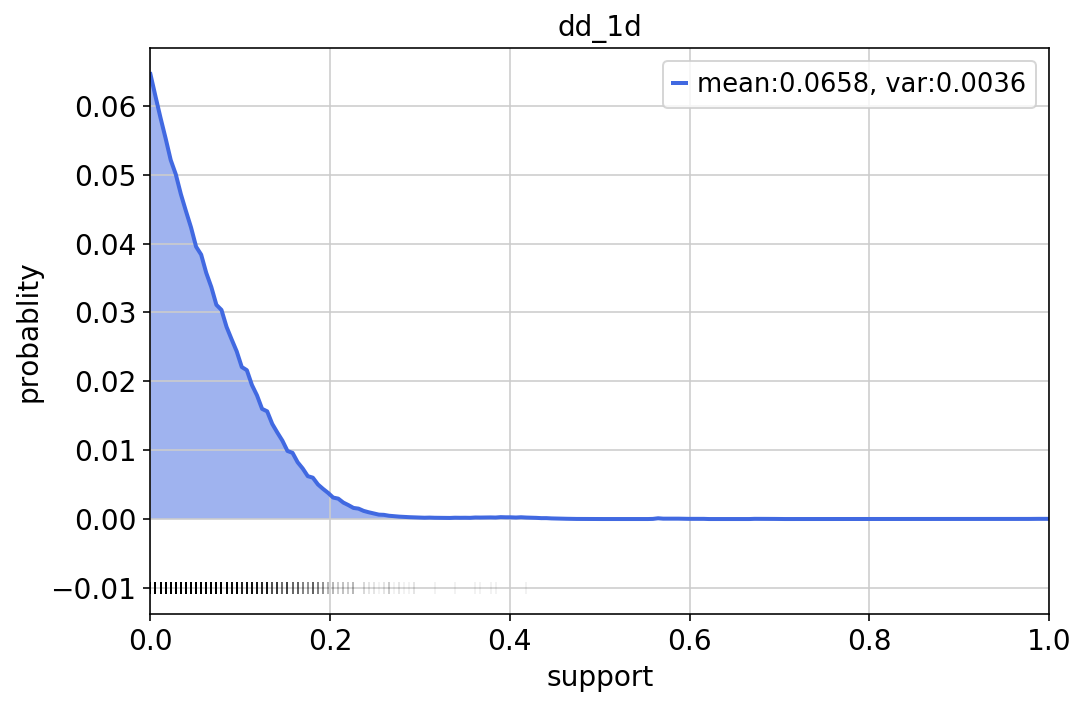

estimated gamma: 39.0
-------------------------------------------------------------------------
IL7R
Average counts per cell = 1.2459133754921847


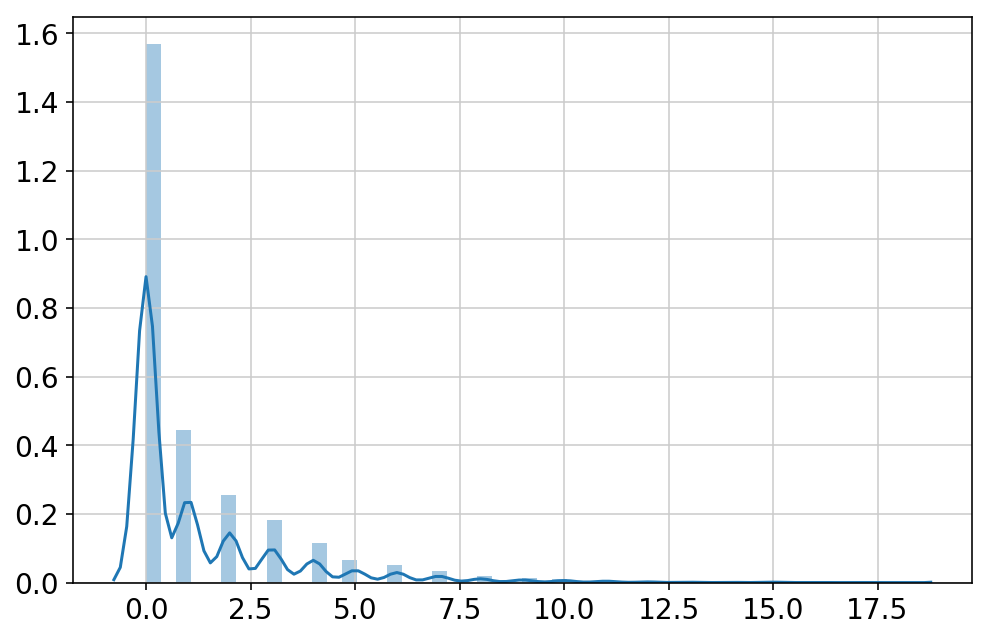

gamma:19
n_degree:7
alpha_hat:  [ 2.44857378  2.25724577  1.1282145  -2.28211289 -1.41151936 -0.57805831
 -1.56320583]
-l:1.4929698703076433, reg:0.002234172998449253


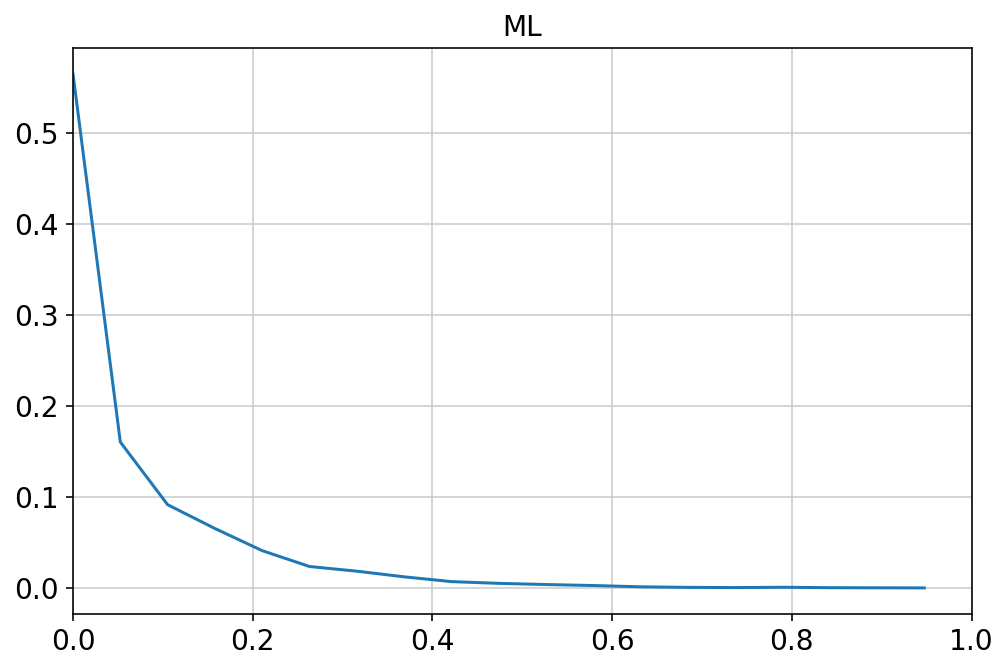

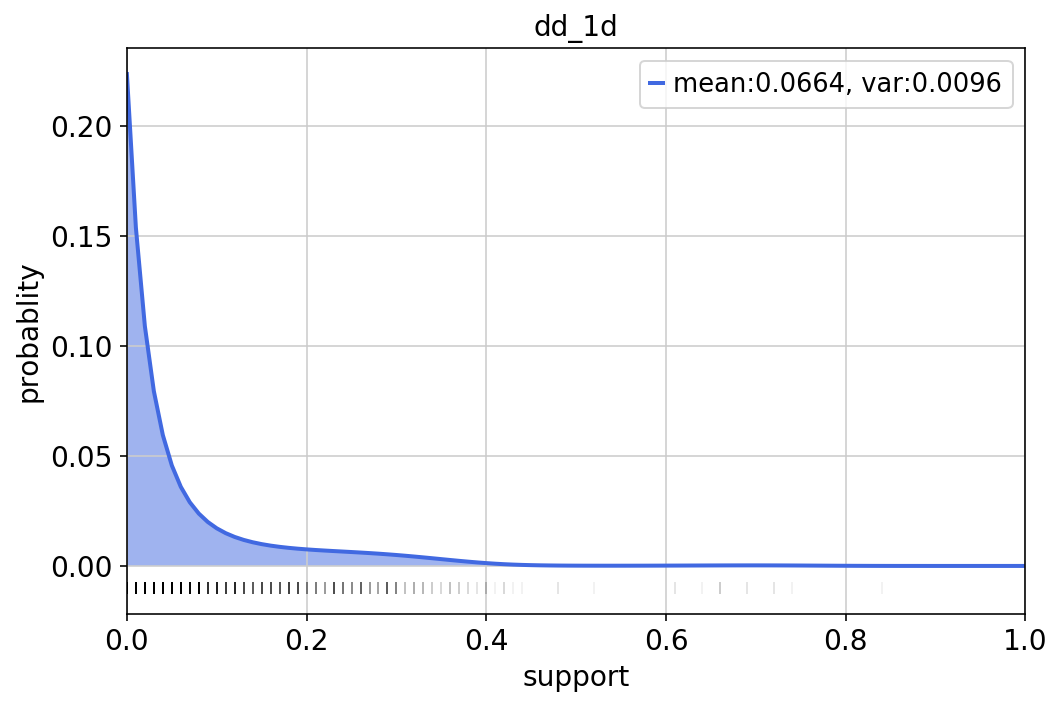

estimated gamma: 19.0
-------------------------------------------------------------------------
LST1
Average counts per cell = 2.914568667223482


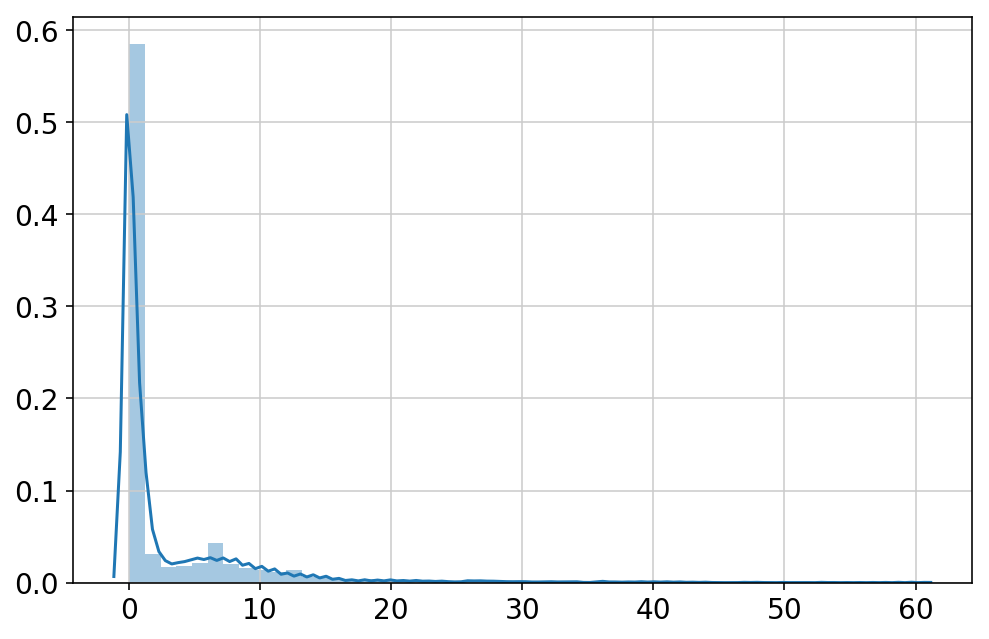

gamma:47
n_degree:7
alpha_hat:  [ 2.56582071  3.21490036  0.83482992 -7.89593973  0.42158622  1.77994714
 -0.92330179]
-l:1.898291512946225, reg:0.008416025831321493


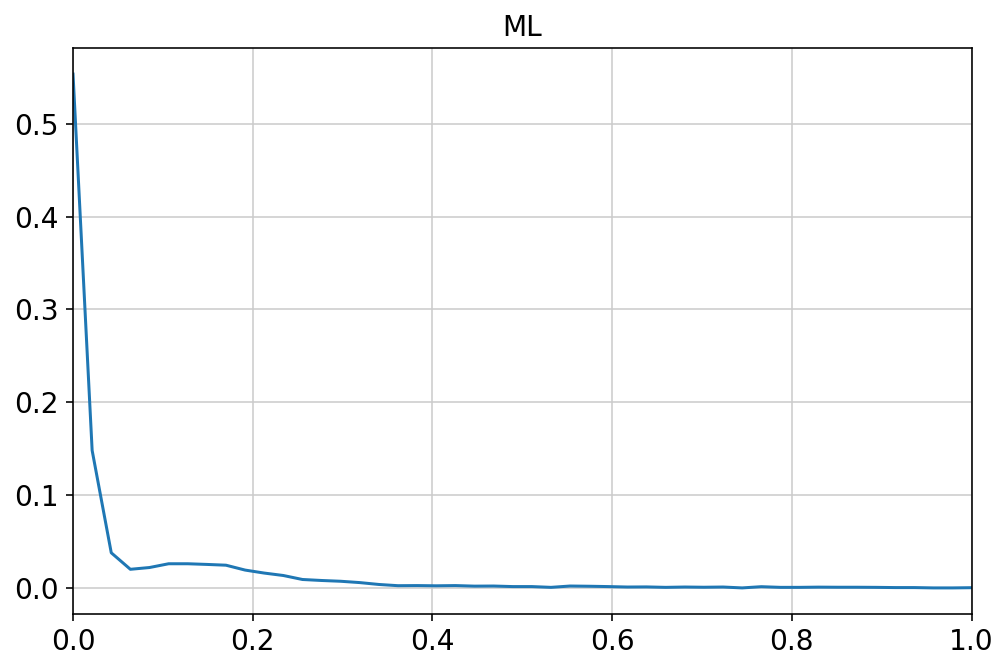

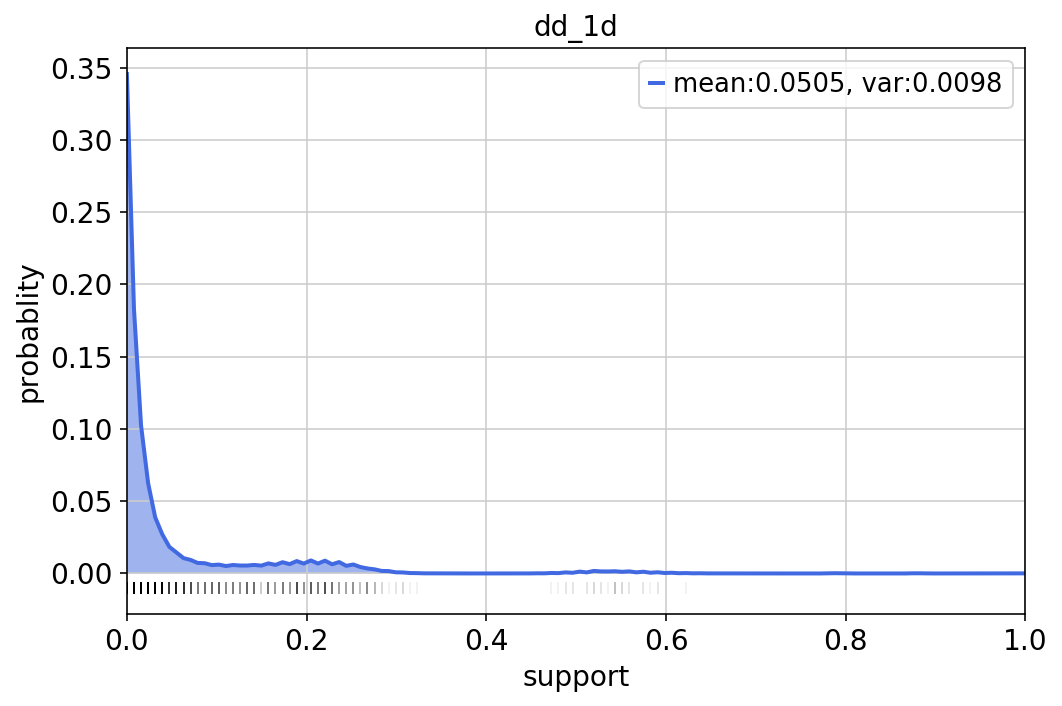

estimated gamma: 60.0
-------------------------------------------------------------------------
PF4
Average counts per cell = 0.09402219305572128


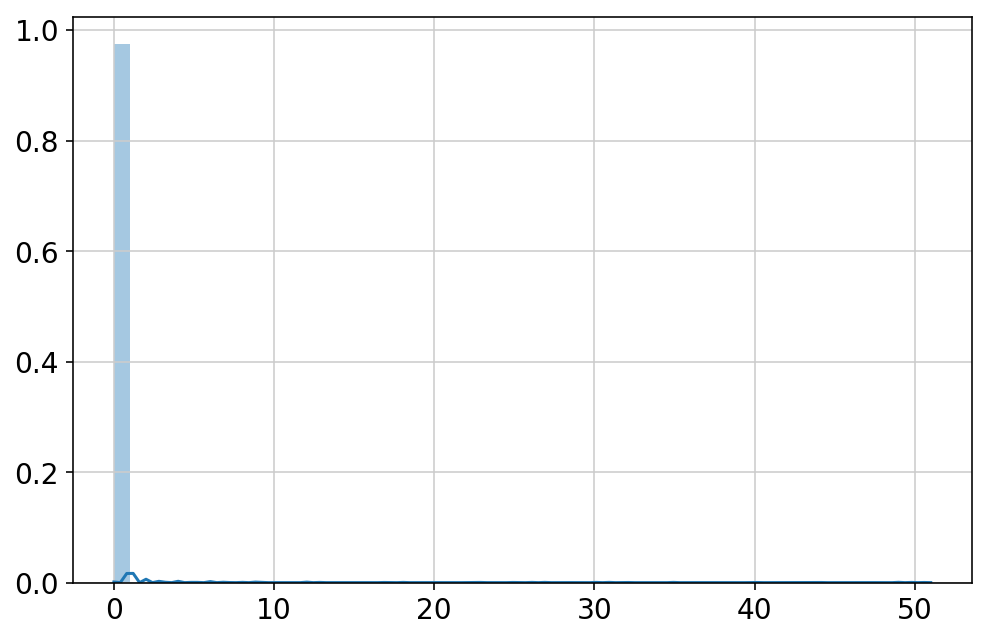

gamma:4
n_degree:7
alpha_hat:  [ 0.10255775 -0.37028006  0.39634839 -0.15830614  0.15497878 -0.23206436
  0.10657122]
-l:0.08017259030099291, reg:4.190080146934971e-05


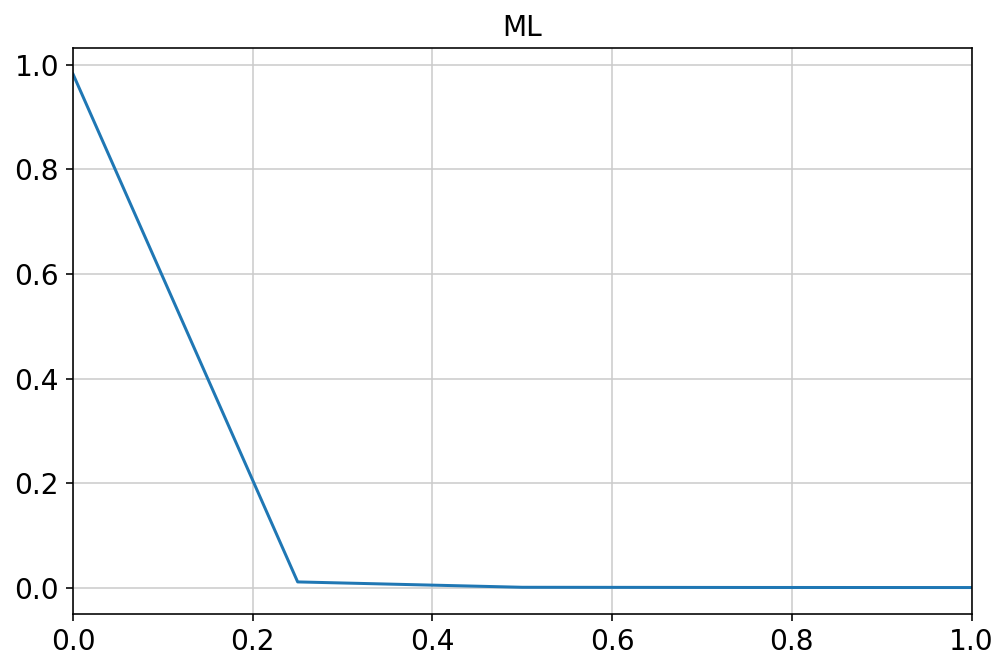

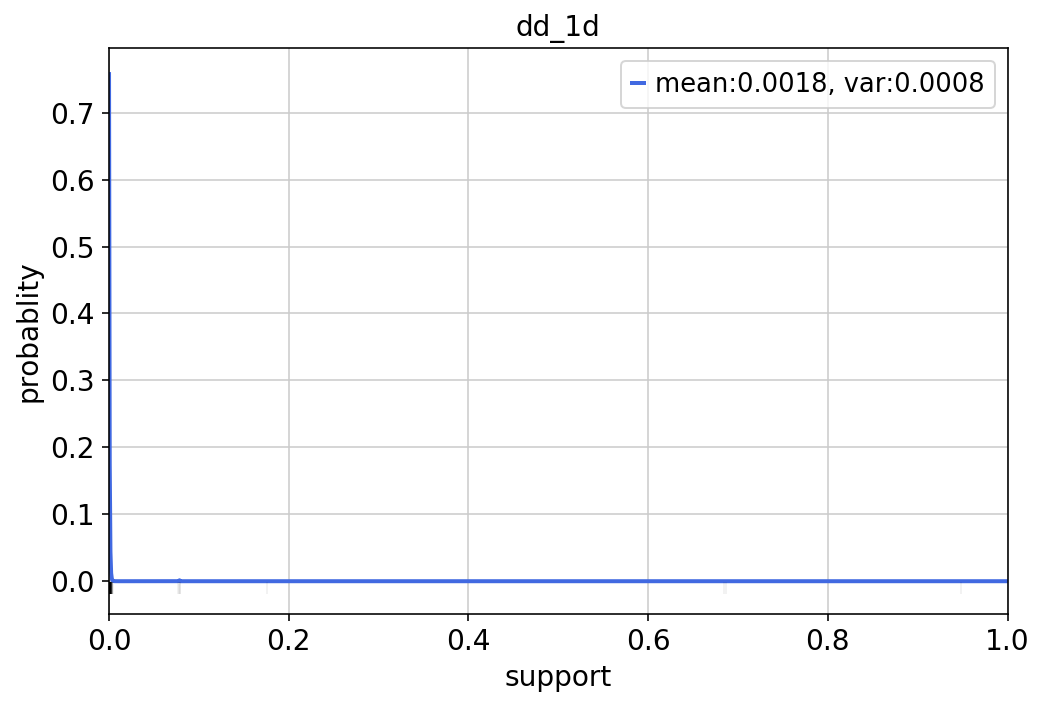

estimated gamma: 51.0
-------------------------------------------------------------------------
NKG7
Average counts per cell = 2.4571053573559243


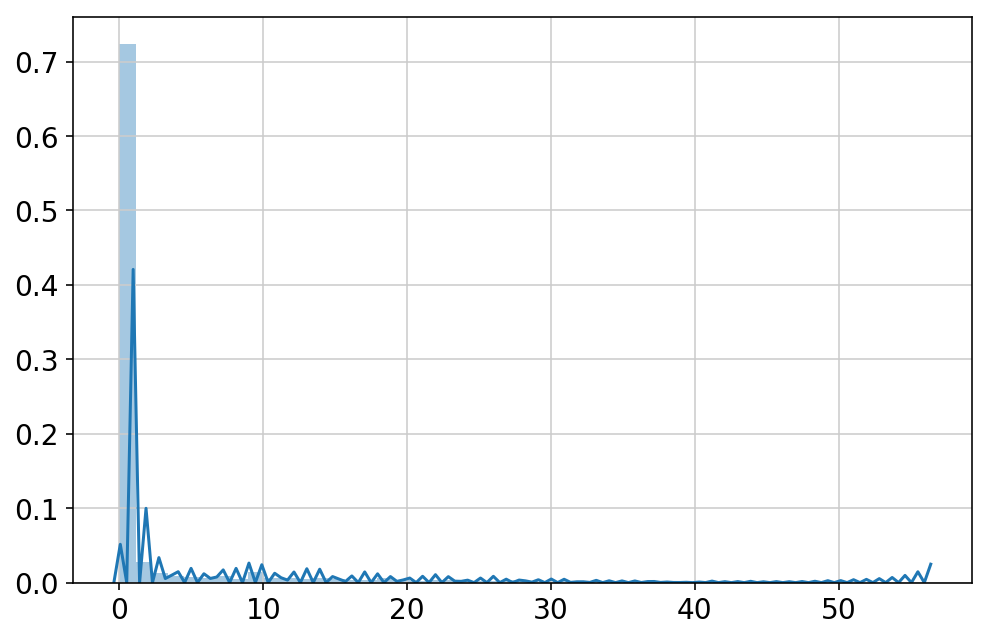

gamma:47
n_degree:7
alpha_hat:  [ 0.28074431  2.01290151  1.83983485 -3.67794978  0.58208177  0.69635433
 -1.77657659]
-l:1.5182030287036248, reg:0.0025022849639186277


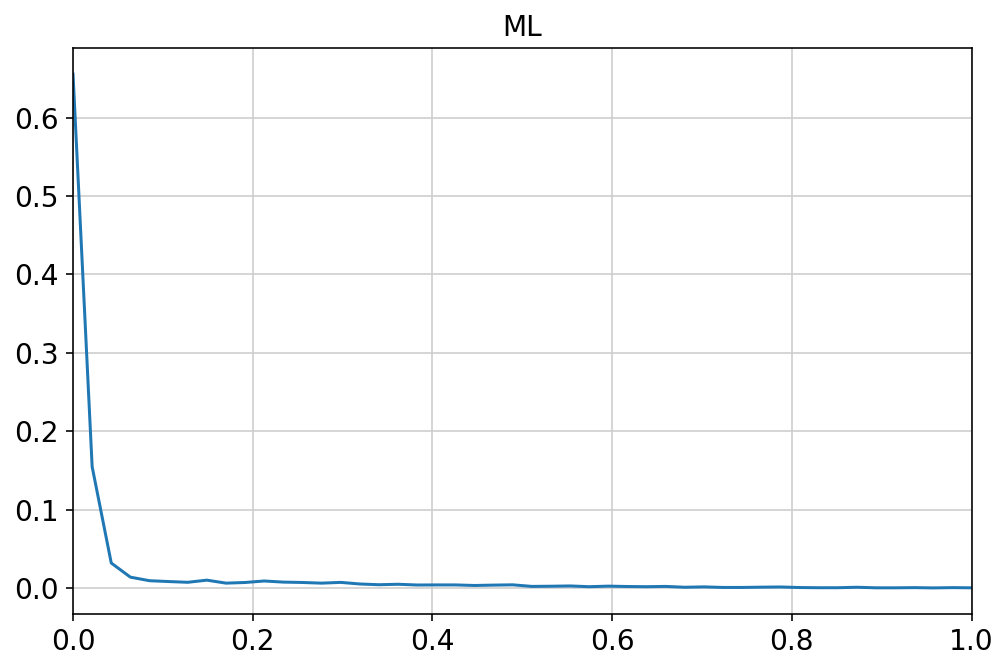

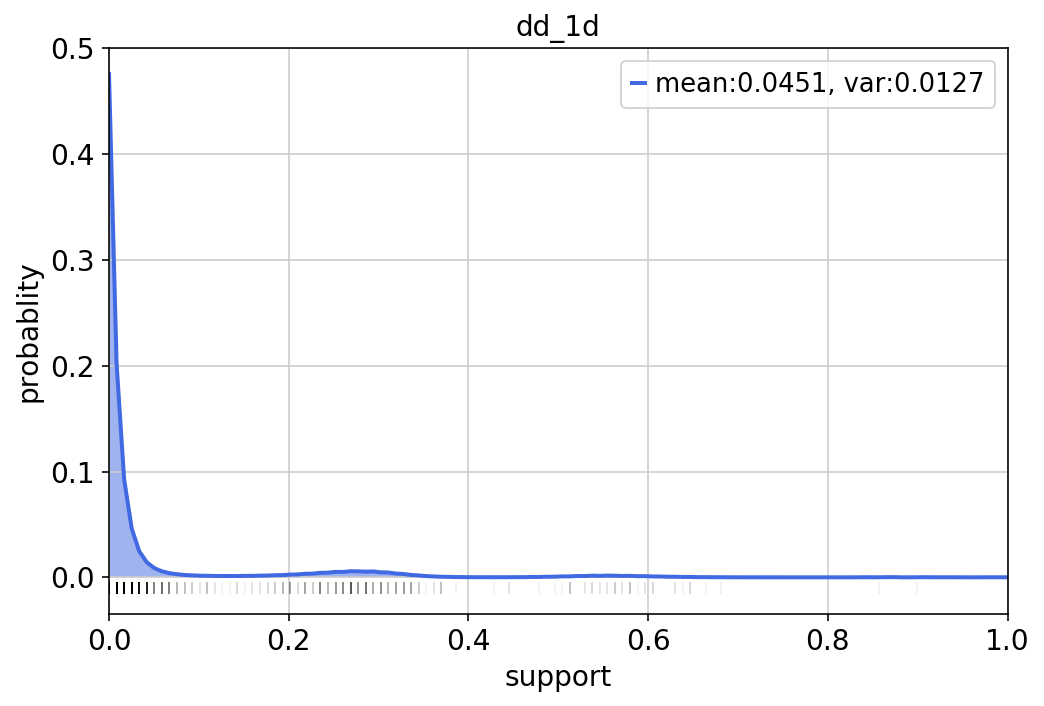

estimated gamma: 56.0
-------------------------------------------------------------------------
CST3
Average counts per cell = 7.001789762558167


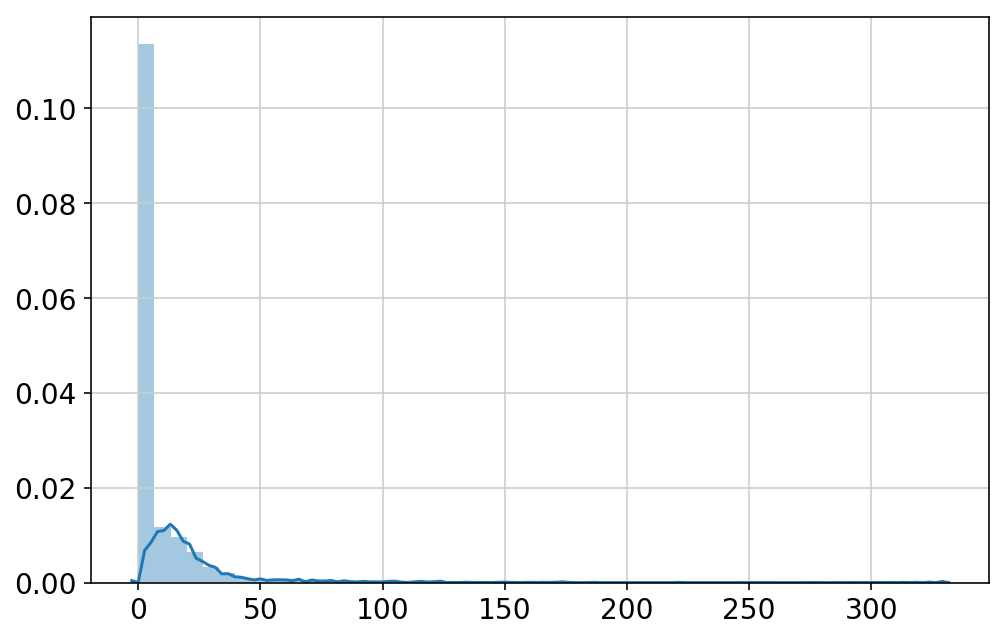

gamma:112
n_degree:7
alpha_hat:  [ 2.69659075  3.31994636  0.82967042 -8.17998716  1.17593824  1.76083597
 -1.60796483]
-l:2.4350556483860535, reg:0.009296311330597141


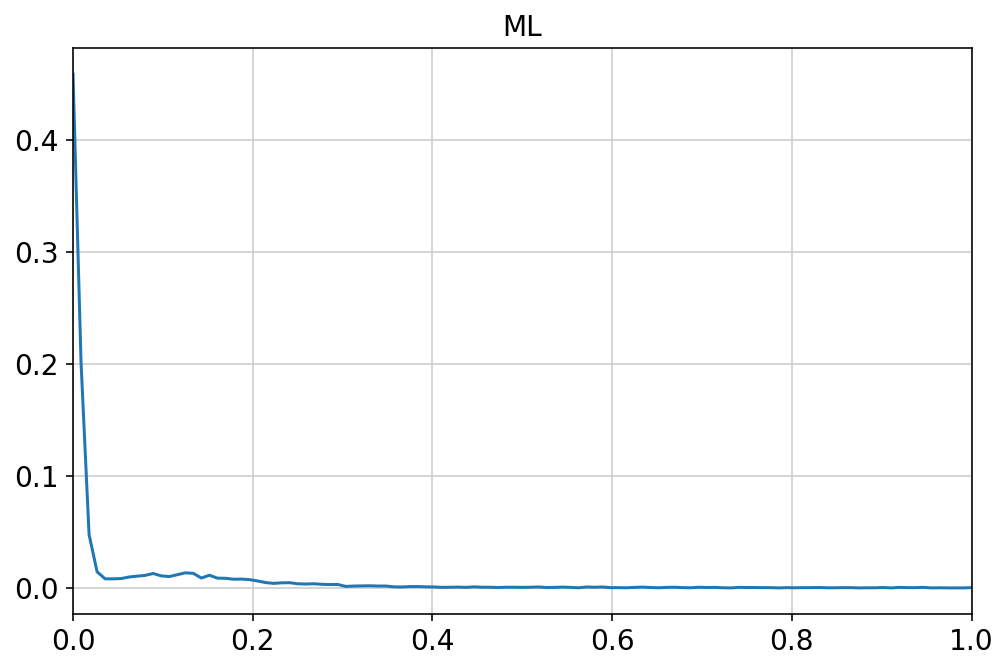

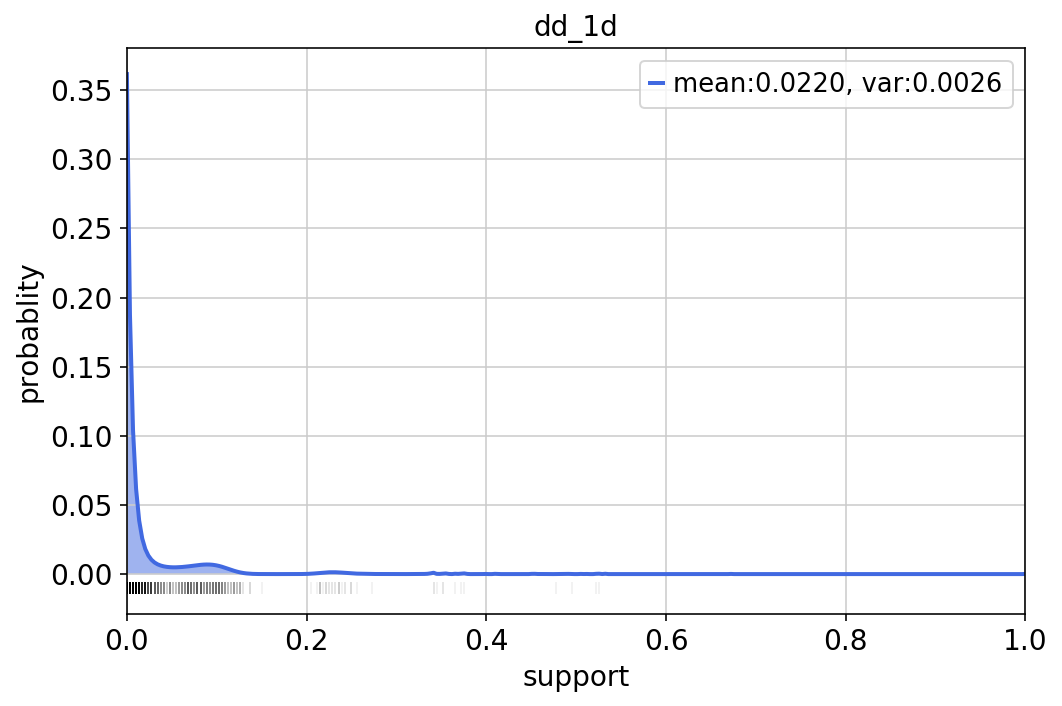

estimated gamma: 329.0
-------------------------------------------------------------------------
CCR7
Average counts per cell = 0.4827586206896552


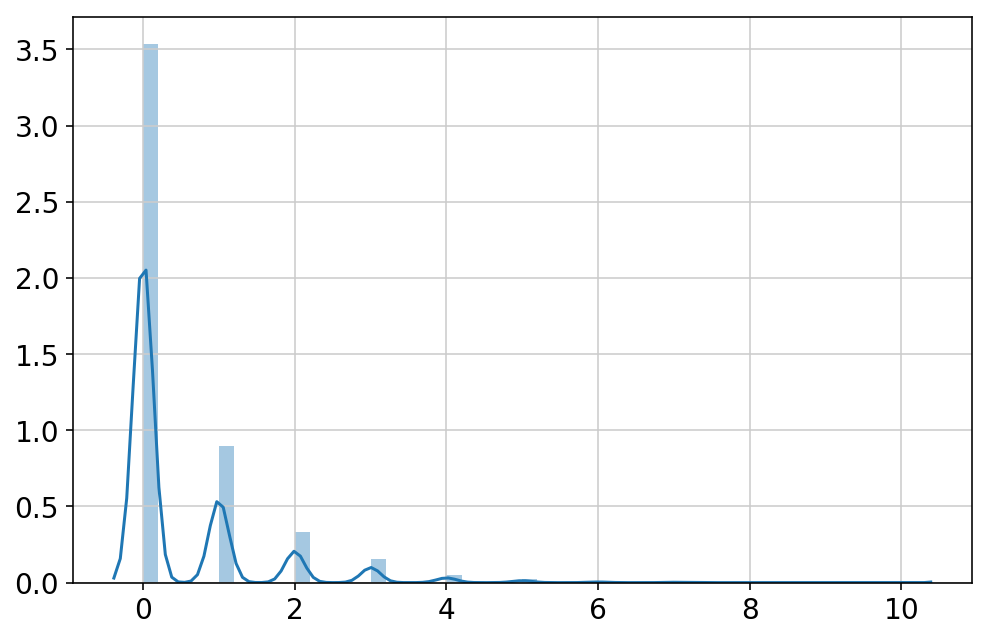

gamma:10
n_degree:7
alpha_hat:  [ 2.91049561  1.72835337  0.46894331 -1.26137661 -1.59997932 -0.79661042
 -1.45062493]
-l:0.92764493334913, reg:0.001856800352794814


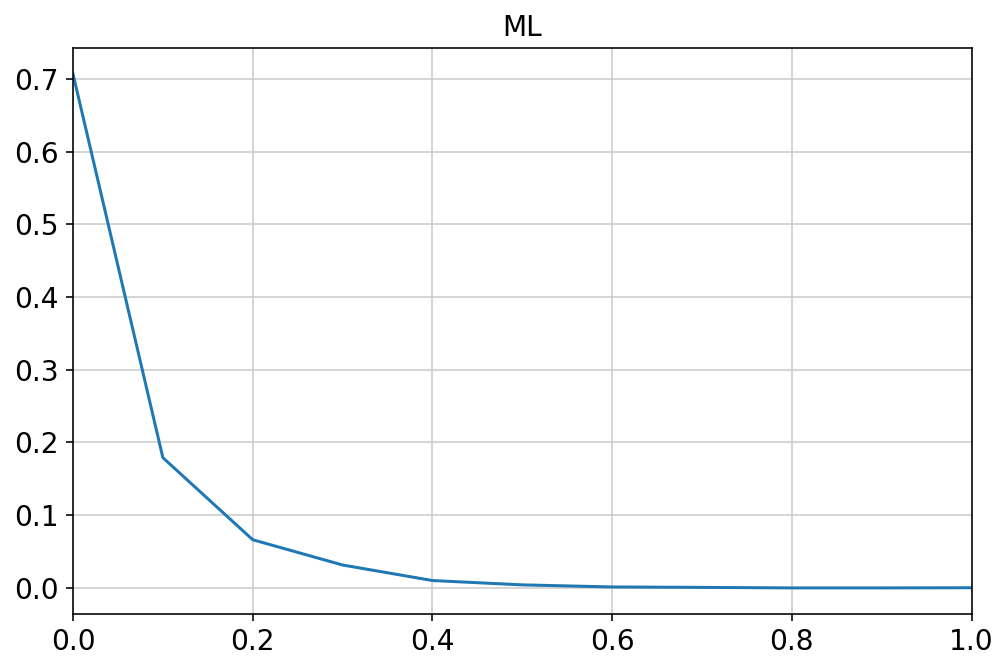

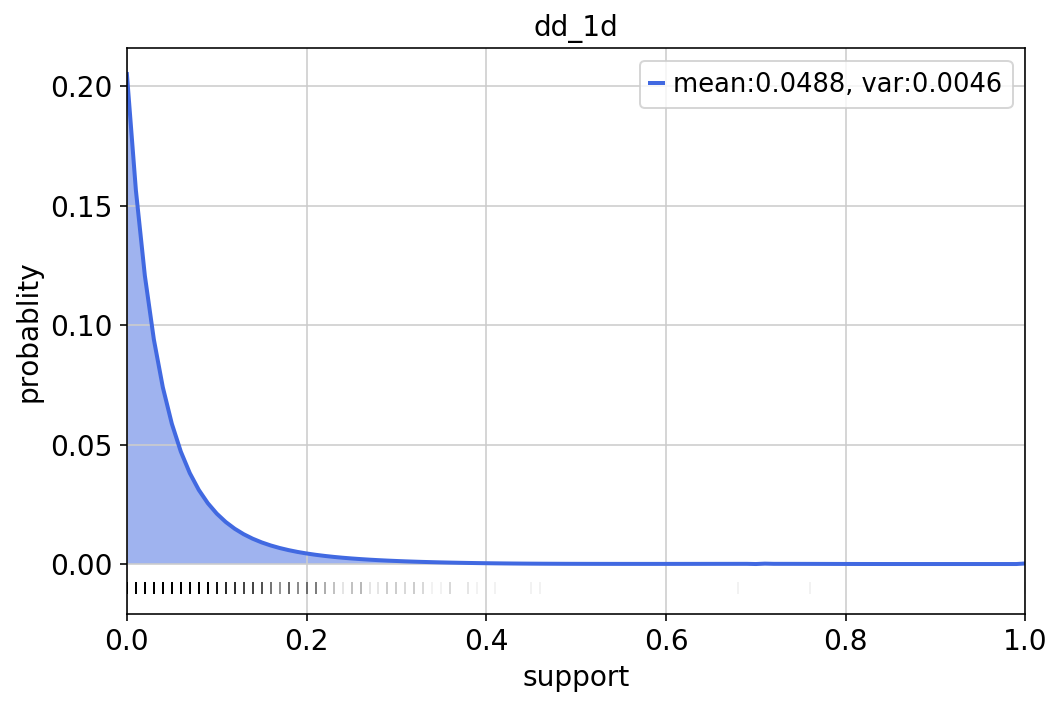

estimated gamma: 10.0
-------------------------------------------------------------------------


In [36]:
for gene in genes:
    Y=np.array(adata[:,gene].X,dtype=int)
    print(gene)
    print("Average counts per cell =",np.sum(Y)/len(Y))
    plt.figure(figsize=[8,5])
    sns.distplot(Y)
    plt.show()
    plt.figure(figsize=[8,5])
    p_hat_ml,ml_info=ml_1d(Y)
    plt.plot(ml_info['x'],p_hat_ml)
    plt.xlim([0,1])
    plt.title('ML')

    p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None)
    print("estimated gamma:",dd_info['gamma'])
    print("-------------------------------------------------------------------------")

In [217]:
def plot_density_1d(p,x):
    M1,M2 = moments(p,x)
    plt.figure(figsize=[8,5])
    plt.plot(x,p,marker='.',lw=2,markersize=0,color="royalblue",label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1.05*np.max(p)])
    
    
#     plt.bar(x,p,label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    

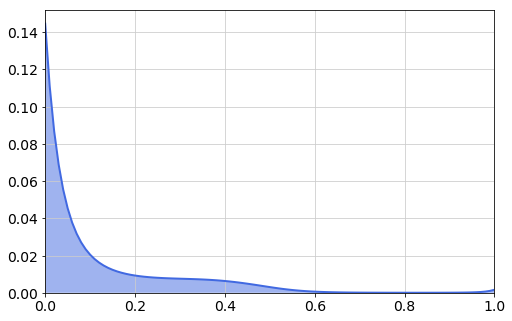

In [218]:
plot_density_1d(p_hat,dd_info['x'])